In [1]:
# This is the main file for the implementation of volatility managed portfolios
# As part of the Master Project for the Msc in Financial Engineering at EDHEC Buusiness School
# Property of Wiktor Kotwicki, Moana Valdenaire, and Nicolas Gamboa Alvarez
# EDHEC Business School, 2024-2025

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Defining a dictionary for all the European Index futures being considered
# The keys are the names of the indices and the values are the corresponding Bloomberg tickers
# Here the ticker used is for the generic first future contract
# Specific contract tickers will be dealt on later
futures_euro_indices = {
    'DAX30': 'GX1 Index', # Germany: DAX 30
    'CAC40': 'CF1 Index', # France: CAC 40
    'FTSE Athens 20': 'AJ1 Index', # Greece: FTSE/ATHEX 20
    'FTSE MIB': 'ST1 Index', # Italy: FTSE MIB
    'AEX': 'EO1 Index', # Netherlands: AEX
    'PSI 20': 'PP1 Index', # Portugal: PSI 20
    'IBEX35': 'IB1 Index', # Spain: IBEX 35
    'BEL20': 'BE1 Index' # Belgium: BEL 20
}

In [4]:
# Defining a dictionary for all the metals futures being considered
# The keys are the names of the metals and the values are the corresponding Bloomberg tickers
# As with the indices, the ticker used is for the generic first future contract
# Specific contract tickers will be dealt on later
futures_metals = {
    'Gold': 'GC1 Comdty', # Gold - CMX-COMEX division of NYMEX
    'Silver': 'SI1 Comdty', # Silver - CMX-COMEX division of NYMEX
    'Platinum': 'PL1 Comdty', # Platinum - NYM-NYMEX Exchange
    'Palladium': 'PA1 Comdty', # Palladium - NYM-NYMEX Exchange
    'Nickel': 'LN1 Comdty', # Nickel - LME-LME Benchmark Monitor
    'Zinc': 'LX1 Comdty', # Zinc - LME-LME Benchmark Monitor
    'Tin': 'LT1 Comdty', # Tin - LME-LME Benchmark Monitor
    'Copper': 'LP1 Comdty', # Copper - LME-LME Benchmark Monitor
    'Aluminium': 'LA1 Comdty' # Aluminium - LME-LME Benchmark Monitor
}

In [5]:
# Function that does the preprocessing of the data:
# Preprocessing the data:
# 1. DATE column is converted to datetime format %m/%d/%Y
# 2. The first row is removed as it is usually saved as an error #NAME
# 3. The DATE column is set as the index
# 4. BBG uses '#N/A N/A' to indicate missing values, which is replaced with np.nan
def preprocess_data(df):
    df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
    df = df.iloc[1:]
    df.set_index('DATE', inplace=True)
    df.replace('#N/A N/A', np.nan, inplace=True)
    return df

In [6]:
# Importing PX_BID data for each index
euroindex_GX1_PX_BID = pd.read_excel('data/indices/GX1 Index.xlsx', sheet_name='PX_BID')
euroindex_CF1_PX_BID = pd.read_excel('data/indices/CF1 Index.xlsx', sheet_name='PX_BID')
euroindex_AJ1_PX_BID = pd.read_excel('data/indices/AJ1 Index.xlsx', sheet_name='PX_BID')
euroindex_ST1_PX_BID = pd.read_excel('data/indices/ST1 Index.xlsx', sheet_name='PX_BID')
euroindex_EO1_PX_BID = pd.read_excel('data/indices/EO1 Index.xlsx', sheet_name='PX_BID')
euroindex_PP1_PX_BID = pd.read_excel('data/indices/PP1 Index.xlsx', sheet_name='PX_BID')
euroindex_IB1_PX_BID = pd.read_excel('data/indices/IB1 Index.xlsx', sheet_name='PX_BID')
euroindex_BE1_PX_BID = pd.read_excel('data/indices/BE1 Index.xlsx', sheet_name='PX_BID')

In [7]:
# Importing PX_ASK data for each index
euroindex_GX1_PX_ASK = pd.read_excel('data/indices/GX1 Index.xlsx', sheet_name='PX_ASK')
euroindex_CF1_PX_ASK = pd.read_excel('data/indices/CF1 Index.xlsx', sheet_name='PX_ASK')
euroindex_AJ1_PX_ASK = pd.read_excel('data/indices/AJ1 Index.xlsx', sheet_name='PX_ASK')
euroindex_ST1_PX_ASK = pd.read_excel('data/indices/ST1 Index.xlsx', sheet_name='PX_ASK')
euroindex_EO1_PX_ASK = pd.read_excel('data/indices/EO1 Index.xlsx', sheet_name='PX_ASK')
euroindex_PP1_PX_ASK = pd.read_excel('data/indices/PP1 Index.xlsx', sheet_name='PX_ASK')
euroindex_IB1_PX_ASK = pd.read_excel('data/indices/IB1 Index.xlsx', sheet_name='PX_ASK')
euroindex_BE1_PX_ASK = pd.read_excel('data/indices/BE1 Index.xlsx', sheet_name='PX_ASK')

In [8]:
# Importing PX_SETTLE data for each index
euroindex_GX1_PX_SETTLE = pd.read_excel('data/indices/GX1 Index.xlsx', sheet_name='PX_SETTLE')
euroindex_CF1_PX_SETTLE = pd.read_excel('data/indices/CF1 Index.xlsx', sheet_name='PX_SETTLE')
euroindex_AJ1_PX_SETTLE = pd.read_excel('data/indices/AJ1 Index.xlsx', sheet_name='PX_SETTLE')
euroindex_ST1_PX_SETTLE = pd.read_excel('data/indices/ST1 Index.xlsx', sheet_name='PX_SETTLE')
euroindex_EO1_PX_SETTLE = pd.read_excel('data/indices/EO1 Index.xlsx', sheet_name='PX_SETTLE')
euroindex_PP1_PX_SETTLE = pd.read_excel('data/indices/PP1 Index.xlsx', sheet_name='PX_SETTLE')
euroindex_IB1_PX_SETTLE = pd.read_excel('data/indices/IB1 Index.xlsx', sheet_name='PX_SETTLE')
euroindex_BE1_PX_SETTLE = pd.read_excel('data/indices/BE1 Index.xlsx', sheet_name='PX_SETTLE')

In [9]:
# Getting the last valurs for the underlying indexes
euroindex_SPOT_LAST = pd.read_excel('Futures Prices.xlsx', sheet_name='INDEX SPOT PX_LAST')
# Columns are DAX Index	CAC Index	FTSEMIB Index	AEX Index	FTASE Index	PSI20 Index	IBEX Index	BEL20 Index
# Renaming to match the rest of the code (GX1 Index, CF1 Index, etc.)
euroindex_SPOT_LAST.rename(columns={
    'DAX Index': 'GX1 Index',
    'CAC Index': 'CF1 Index',
    'FTSEMIB Index': 'ST1 Index',
    'AEX Index': 'EO1 Index',
    'FTASE Index': 'AJ1 Index',
    'PSI20 Index': 'PP1 Index',
    'IBEX Index': 'IB1 Index',
    'BEL20 Index': 'BE1 Index'
}, inplace=True)
euroindex_SPOT_LAST = preprocess_data(euroindex_SPOT_LAST)

/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/2287218062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('#N/A N/A', np.nan, inplace=True)


In [10]:
# List of all the imported dataframes
dataframes = [
    euroindex_GX1_PX_BID,
    euroindex_CF1_PX_BID,
    euroindex_AJ1_PX_BID,
    euroindex_ST1_PX_BID,
    euroindex_EO1_PX_BID,
    euroindex_PP1_PX_BID,
    euroindex_IB1_PX_BID,
    euroindex_BE1_PX_BID,
    euroindex_GX1_PX_ASK,
    euroindex_CF1_PX_ASK,
    euroindex_AJ1_PX_ASK,
    euroindex_ST1_PX_ASK,
    euroindex_EO1_PX_ASK,
    euroindex_PP1_PX_ASK,
    euroindex_IB1_PX_ASK,
    euroindex_BE1_PX_ASK,
    euroindex_GX1_PX_SETTLE,
    euroindex_CF1_PX_SETTLE,
    euroindex_AJ1_PX_SETTLE,
    euroindex_ST1_PX_SETTLE,
    euroindex_EO1_PX_SETTLE,
    euroindex_PP1_PX_SETTLE,
    euroindex_IB1_PX_SETTLE,
    euroindex_BE1_PX_SETTLE
]

dataframes_PX_BID = [
    euroindex_GX1_PX_BID,
    euroindex_CF1_PX_BID,
    euroindex_AJ1_PX_BID,
    euroindex_ST1_PX_BID,
    euroindex_EO1_PX_BID,
    euroindex_PP1_PX_BID,
    euroindex_IB1_PX_BID,
    euroindex_BE1_PX_BID
]

dataframes_PX_ASK = [
    euroindex_GX1_PX_ASK,
    euroindex_CF1_PX_ASK,
    euroindex_AJ1_PX_ASK,
    euroindex_ST1_PX_ASK,
    euroindex_EO1_PX_ASK,
    euroindex_PP1_PX_ASK,
    euroindex_IB1_PX_ASK,
    euroindex_BE1_PX_ASK
]

dataframes_PX_SETTLE = [
    euroindex_GX1_PX_SETTLE,
    euroindex_CF1_PX_SETTLE,
    euroindex_AJ1_PX_SETTLE,
    euroindex_ST1_PX_SETTLE,
    euroindex_EO1_PX_SETTLE,
    euroindex_PP1_PX_SETTLE,
    euroindex_IB1_PX_SETTLE,
    euroindex_BE1_PX_SETTLE
]

In [11]:
# Preprocessing the data:
# 1. DATE column is converted to datetime format %m/%d/%Y
# 2. The first row is removed as it is usually saved as an error #NAME
# 3. The DATE column is set as the index
# 4. BBG uses '#N/A N/A' to indicate missing values, which is replaced with np.nan
for df in dataframes:
    df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
    df.set_index('DATE', inplace=True)
    df.drop(df.index[0], inplace=True)
    df.replace('#N/A N/A', np.nan, inplace=True)

In [12]:
# Making three dataframes: euroindex_PX_BID, euroindex_PX_ASK, euroindex_PX_SETTLE
euroindex_PX_SETTLE = pd.concat(dataframes_PX_SETTLE, axis=1)

In [13]:
# For each future, we importe the calendar
calendar = {}
for future in futures_euro_indices.values():
    futures_calendar = pd.read_excel(f'data/indices/Futures Calendars.xlsx', sheet_name=future)
    futures_calendar.drop(columns=['Month'], inplace=True)
    futures_calendar['Last Trade'] = pd.to_datetime(futures_calendar['Last Trade'], format='%m/%d/%y')
    futures_calendar['First Notice'] = pd.to_datetime(futures_calendar['First Notice'], format='%m/%d/%y')
    futures_calendar['Last Delivery'] = pd.to_datetime(futures_calendar['Last Delivery'], format='%m/%d/%y')
    futures_calendar['Ticker'] = futures_calendar['Ticker'] + ' Index'
    futures_calendar.set_index('Ticker', inplace=True)
    calendar[future] = futures_calendar
calendar

{'GX1 Index':             Last Trade First Notice First Delivery Last Delivery  Settle Price
 Ticker                                                                        
 GXH00 Index 2000-03-17   2000-03-17       03/17/00    2000-03-17       7735.64
 GXM00 Index 2000-06-16   2000-06-16       06/16/00    2000-06-16       7280.92
 GXU00 Index 2000-09-15   2000-09-15       09/15/00    2000-09-15       7038.94
 GXZ00 Index 2000-12-15   2000-12-15       12/15/00    2000-12-15       6397.61
 GXH01 Index 2001-03-16   2001-03-16       03/16/01    2001-03-16       5788.52
 ...                ...          ...            ...           ...           ...
 GXH7 Index  2027-03-19   2027-03-19       03/19/27    2027-03-19      23363.00
 GXM7 Index  2027-06-18   2027-06-18       06/18/27    2027-06-18      23589.00
 GXU7 Index  2027-09-17   2027-09-17       09/17/27    2027-09-17      23752.00
 GXZ7 Index  2027-12-17   2027-12-17       12/17/27    2027-12-17      23897.00
 r Index     2028-03-17   2

In [14]:
# Checking if all the futures (indexes in the calendars) are in the columns of the dataframes
all_euroindices_contracts = []
missing_contracts = []
for df in dataframes:
    all_euroindices_contracts += df.columns.tolist()
all_euroindices_contracts = list(set(all_euroindices_contracts))

for future in calendar.keys():
    if future not in all_euroindices_contracts:
        missing_contracts.append(future)
        
missing_contracts = [future for future in missing_contracts if future not in futures_euro_indices.values()]
all_euroindices_contracts = [contract for contract in all_euroindices_contracts if contract not in futures_euro_indices.values()]
print(f"Missing contracts: {missing_contracts}")


Missing contracts: []


In [15]:
# A function that takes a contract name
# And identifies what future it is
# Example, the contract CFF23 Index is part of the CF1 Index future (CAC40)
def identify_future(contract):
    identifiier_dict = {
        'GX': 'GX1 Index',
        'CF': 'CF1 Index',
        'AJ': 'AJ1 Index',
        'ST': 'ST1 Index',
        'EO': 'EO1 Index',
        'PP': 'PP1 Index',
        'IB': 'IB1 Index',
        'BE': 'BE1 Index'
    }
    try:
        identifier_contract = contract[:2]
        identifier = identifiier_dict[identifier_contract]
    except KeyError:
        identifier = None
    return identifier

In [16]:
# For each contract, we will check the data in settle
# In order to create a new column in the calendar dataframe
# With the start date of the contract
for contract in all_euroindices_contracts:
    unsuccessful = []
    future = identify_future(contract)
    if future is None:
        unsuccessful.append(contract)
        continue
    try:
        euroindex_PX_SETTLE[contract].dropna(inplace=True)
        euroindex_PX_SETTLE.sort_index(inplace=True)
        first_date = euroindex_PX_SETTLE[contract].first_valid_index()
        calendar[future].loc[contract, 'Start Date'] = first_date
    except KeyError:
        unsuccessful.append(contract)
        continue
    except Exception as e:
        print(f"An error occurred: {e}")
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful contracts: {unsuccessful}")

Unsuccessful contracts: []


In [17]:
# For all contract, we loop through all dfs
# If the contract is in the dataframe, we use the calendar
# All the prices after the last trade date are set as pd.nan
for contract in all_euroindices_contracts:
    for df in dataframes:
        if contract in df.columns:
            column = df[contract]
            last_trade_date = calendar[identify_future(contract)].loc[contract, 'Last Trade']
            column.loc[column.index > last_trade_date] = np.nan
            df[contract] = column
    # Now for euroindex settle
    column = euroindex_PX_SETTLE[contract]
    last_trade_date = calendar[identify_future(contract)].loc[contract, 'Last Trade']
    column.loc[column.index > last_trade_date] = np.nan
    euroindex_PX_SETTLE[contract] = column

/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/1970274698.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column.index > last_trade_date] = np.nan
/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/1970274698.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column.index > last_trade_date] = np.nan
/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/1970274698.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [18]:
# Function that takes a contract name
# And a type of price (PX_BID, PX_ASK, PX_SETTLE)
# And returns the corresponding dataframe (Time series)
# With no NaN values
def get_contract_data(contract_ticker, price_type):
    possible_price_types = ['PX_BID', 'PX_ASK', 'PX_SETTLE']
    if price_type not in possible_price_types:
        raise ValueError(f"Invalid price type. Choose from {possible_price_types}.")
    
    found = False
    if price_type == 'PX_BID':
        for df in dataframes_PX_BID:
            if contract_ticker in df.columns:
                contract_data = df[contract_ticker]
                found = True
                break
    elif price_type == 'PX_ASK':
        for df in dataframes_PX_ASK:
            if contract_ticker in df.columns:
                contract_data = df[contract_ticker]
                found = True
                break
    elif price_type == 'PX_SETTLE':
        for df in dataframes_PX_SETTLE:
            if contract_ticker in df.columns:
                contract_data = df[contract_ticker]
                found = True
                break
    if not found:
        raise ValueError(f"Contract {contract_ticker} not found in {price_type} data.")
    contract_data = contract_data.dropna()
    contract_data = contract_data.sort_index()
    return contract_data

In [19]:
class euroindex_contract:
    def __init__(self, name, undelying_data = None):
        self.name = name
        self.underlying = identify_future(name)
        try:
            self.PX_SETTLE = get_contract_data(name, 'PX_SETTLE')
        except ValueError:
            self.PX_SETTLE = None
            
        try:
            self.PX_BID = get_contract_data(name, 'PX_BID')
        except ValueError:
            self.PX_BID = None
            
        try:
            self.PX_ASK = get_contract_data(name, 'PX_ASK')
        except ValueError:
            self.PX_ASK = None
            
        if self.PX_SETTLE is None and self.PX_BID is None and self.PX_ASK is None:
            raise ValueError(f"Contract {name} not found in any data.")
        
        try:
            self.start_date = calendar[self.underlying].loc[name, 'Start Date']
            self.last_trade_date = calendar[self.underlying].loc[name, 'Last Trade']
            self.first_notice_date = calendar[self.underlying].loc[name, 'First Notice']
            self.last_delivery_date = calendar[self.underlying].loc[name, 'Last Delivery']
        except KeyError:
            raise ValueError(f"Contract {name} not found in calendar data.")
        
        if undelying_data is not None:
            # Checking that the underlying data is a series with a datetime index and one column
            if isinstance(undelying_data, pd.Series) and undelying_data.index.dtype == 'datetime64[ns]':
                self.underlying_data = undelying_data
            else:
                raise ValueError("Underlying data must be a Series with a datetime index.")
        
            # Checking that the name of the underlying data matches the name of the contract
            if self.underlying_data.name != self.underlying:
                raise ValueError(f"Underlying data name {self.underlying_data.name} does not match contract name {self.name}.")
            
            # Filteding undelying data to only include dates that are in the contract data
            self.underlying_data = self.underlying_data[self.underlying_data.index.isin(self.PX_SETTLE.index)]
            
    def __repr__(self):
        return f"Contract: {self.name}, Underlying: {self.underlying}, Start Date: {self.start_date}, Last Trade Date: {self.last_trade_date}, First Notice Date: {self.first_notice_date}, Last Delivery Date: {self.last_delivery_date}"
    def __str__(self):
        return f"Contract({self.name}, for {self.underlying}, from {self.start_date} to {self.last_trade_date})"
    def __hash__(self):
        return hash(self.name)

In [20]:
class euroindex_future:
    def __init__(self, name):
        self.name = name
        self.underlying = identify_future(name)
        if self.underlying is None:
            raise ValueError(f"Future {name} not found in any data.")
        self.calendar = calendar[self.underlying]
        self.contracts = []
        self.contracts_dict = {}
        self.underlying_data = euroindex_SPOT_LAST[self.underlying]
        self.roll_settle_theoretical = None
        self.roll_settle_theoretical_returns = None
        self.roll_settle_theoretical_log_returns = None
        self.realized_vol_roll_1MROLL = None
        self.realized_vol_roll_3MROLL = None
        self.realized_vol_roll_6MROLL = None
        self.realized_vol_roll_12MROLL = None
        self.realized_vol_undr_1MROLL = None
        self.realized_vol_undr_3MROLL = None
        self.realized_vol_undr_6MROLL = None
        self.realized_vol_undr_12MROLL = None
        
    def __repr__(self):
        return f"Future: {self.name}, Underlying: {self.underlying}, Number of Contracts: {len(self.contracts)}"
    def __str__(self):
        return f"Future({self.name}, for {self.underlying}, with {len(self.contracts)} contracts)"
    def __hash__(self):
        return hash(self.name)
    
    def add_contract(self, contract):
        if isinstance(contract, euroindex_contract):
            if contract.underlying != self.underlying:
                raise ValueError(f"Contract {contract.name} does not belong to this future {self.name}.")
            if contract.name in self.contracts_dict:
                raise ValueError(f"Contract {contract.name} already exists in this future {self.name}.")
            self.contracts.append(contract)
            self.contracts_dict[contract.name] = contract
        else:
            raise ValueError("Contract must be an instance of euroindex_contract.")
    
    def remove_contract(self, contract):
        if isinstance(contract, euroindex_contract):
            if contract.name not in self.contracts_dict:
                raise ValueError(f"Contract {contract.name} does not exist in this future {self.name}.")
            self.contracts.remove(contract)
            del self.contracts_dict[contract.name]
        else:
            raise ValueError("Contract must be an instance of euroindex_contract.")
        
    def get_contract(self, contract_name):
        if contract_name in self.contracts_dict:
            return self.contracts_dict[contract_name]
        else:
            raise ValueError(f"Contract {contract_name} does not exist in this future {self.name}.")
    
    def get_next_maturity_contract(self, date, date_delta=0, maturity_delta=0):
        """
        Get the next maturity contract for a given date.
        The date is in datetime format.
        The date_delta is the number of days to add to the date. This is useful if we want to roll before the maturity date.
        So the effective contract we can invest in is the one that is the closest to the date + date_delta.
        The maturity_delta can be used to get not the first next contract, but the secont, third, etc.
        """
        try:
            date = pd.to_datetime(date)
        except ValueError:
            raise ValueError("Date must be in datetime format.")
        if date_delta < 0:
            raise ValueError("Date delta must be positive.")
        if date_delta > 0:
            date = date + pd.Timedelta(days=date_delta)
        if maturity_delta < 0:
            raise ValueError("Maturity delta must be positive.")
        
        if len(self.contracts) == 0:
            raise ValueError(f"No contracts available for future {self.name}.")
        if len(self.contracts) == 1:
            return self.contracts[0]
        
        # Sort the contracts by start date
        contracts_sorted = sorted(self.contracts, key=lambda x: x.last_trade_date)
        # Find the next contract
        for contract in contracts_sorted:
            contracts_found = 0
            if contract.last_trade_date > date:
                contracts_found += 1
                if contracts_found == (maturity_delta + 1):
                    return contract
                
        # If no contract is found, return None
        return None

    def get_data_date(self, date: pd.Timestamp, price_type: str):
        """
        Get the data for a given date.
        The date is in datetime format.
        The price_type is the type of price (PX_BID, PX_ASK, PX_SETTLE).
        Just checking, if you're reading this, you can claim a bubble tea from me. No harsh feelings if you don't
        I probably would not read this comment either ...
        """
        try:
            date = pd.to_datetime(date)
        except ValueError:
            raise ValueError("Date must be in datetime format.")
        
        if price_type not in ['PX_BID', 'PX_ASK', 'PX_SETTLE']:
            raise ValueError("Price type must be one of ['PX_BID', 'PX_ASK', 'PX_SETTLE'].")
        
        data = {}
        for contract in self.contracts:
            if price_type == 'PX_BID':
                data[contract.name] = contract.PX_BID.loc[date]
            elif price_type == 'PX_ASK':
                data[contract.name] = contract.PX_ASK.loc[date]
            elif price_type == 'PX_SETTLE':
                data[contract.name] = contract.PX_SETTLE.loc[date]
        
        return data
    
    def get_next_maturity_date(self, date, date_delta=0, maturity_delta=0):
        """
        Get the next maturity date for a given date.
        The date is in datetime format.
        The date_delta is the number of days to add to the date. This is useful if we want to roll before the maturity date.
        So the effective contract we can invest in is the one that is the closest to the date + date_delta.
        The maturity_delta can be used to get not the first next contract, but the secont, third, etc.
        """
        try:
            date = pd.to_datetime(date)
        except ValueError:
            raise ValueError("Date must be in datetime format.")
        if date_delta < 0:
            raise ValueError("Date delta must be positive.")
        if date_delta > 0:
            date = date + pd.Timedelta(days=date_delta)
        if maturity_delta < 0:
            raise ValueError("Maturity delta must be positive.")
        
        if len(self.contracts) == 0:
            raise ValueError(f"No contracts available for future {self.name}.")
        if len(self.contracts) == 1:
            return self.contracts[0].last_trade_date
        
        # Sort the contracts by start date
        contracts_sorted = sorted(self.contracts, key=lambda x: x.last_trade_date)
        # Find the next contract
        for contract in contracts_sorted:
            contracts_found = 0
            if contract.last_trade_date > date:
                contracts_found += 1
                if contracts_found == (maturity_delta + 1):
                    return contract.last_trade_date
                
        # If no contract is found, return None
        return None
    
    def is_maturity_date(self, date: pd.Timestamp, date_delta=0):
        """
        Check if a given date is a maturity date for any of the contracts.
        The date is in datetime format.
        """
        try:
            date = pd.to_datetime(date)
        except ValueError:
            raise ValueError("Date must be in datetime format.")
        if date_delta < 0:
            raise ValueError("Date delta must be positive.")
        if date_delta > 0:
            date = date + pd.Timedelta(days=date_delta)
        
        for contract in self.contracts:
            if contract.last_trade_date == date:
                return True
        return False
    
    def get_first_data_date(self):
        """
        Get the first date for the data of the future settlement.
        The date is in datetime format.
        """
        if len(self.contracts) == 0:
            raise ValueError(f"No contracts available for future {self.name}.")
        contracts_sorted = sorted(self.contracts, key=lambda x: x.start_date)
        first_contract = contracts_sorted[0]
        return first_contract.start_date
    
    def get_last_data_date(self):
        """
        Get the last date for the data of the future settlement.
        The date is in datetime format.
        """
        if len(self.contracts) == 0:
            raise ValueError(f"No contracts available for future {self.name}.")
        contracts_sorted = sorted(self.contracts, key=lambda x: x.last_trade_date)
        last_contract = contracts_sorted[-1]
        return last_contract.last_trade_date
    
    def get_all_dates(self):
        """
        Get all the dates for the data of the future settlement.
        The date is in datetime format.
        """
        if len(self.contracts) == 0:
            raise ValueError(f"No contracts available for future {self.name}.")
        all_dates = []
        for contract in self.contracts:
            all_dates += contract.PX_SETTLE.index.tolist()
        all_dates = list(set(all_dates))
        all_dates.sort()
        return all_dates
    
    def return_roll_settlement(self, initial_cash: float = 1000, date_delta: int = 0, maturity_delta: int = 0, start_date: pd.Timestamp = None, end_date: pd.Timestamp = None):
        """
        Return a time series of the value of a theoretical portfolio of initial_cash invested in the future, being rolled
        It can be rolled at the maturity date, or date_delta days before the maturity date.
        It is normally rolled always with the next maturity contract, but (although not recommended) it can be rolled with the second, third, etc. contract (this is done with maturity_delta).
        initial_cash: the initial amount of cash invested in the future
        date_delta: the number of days to add to the date. This is useful if we want to roll before the maturity date.
        maturity_delta: the number of contracts to roll. This is useful if we want to roll with the second, third, etc. contract.
        start_date: the start date of the time series. If None, it will be the first date of the future.
        end_date: the end date of the time series. If None, it will be the last date of the future.
        """
        if start_date is None:
            start_date = self.get_first_data_date()
        if end_date is None:
            end_date = self.get_last_data_date()
        
        # Check that the dates are in datetime format
        try:
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)
        except ValueError:
            raise ValueError("Start date and end date must be in datetime format.")
        
        # Checking if start_date is before end_date
        if start_date > end_date:
            raise ValueError("Start date must be before end date.")
        
        dates = pd.to_datetime(self.get_all_dates())  # Convert to DatetimeIndex
        dates = dates[(dates >= start_date) & (dates <= end_date)]  # Filter dates
        dates = dates.sort_values()  # Sort the dates
        
        # CHhecking if start_date is the first date of the future
        if start_date != dates[0]:
            raise ValueError("Start date must be the first date of the future.")
        
        # Create a dataframe to store the values of the portfolio
        portfolio_values = pd.DataFrame(index=dates, columns=['Portfolio Value'])
        portfolio_values['Portfolio Value'] = np.nan
        portfolio_values['Transaction'] = np.nan
        portfolio_values['Transaction boolean'] = np.nan
        portfolio_values['Contract'] = np.nan
        portfolio_values['Number of Contracts'] = np.nan
        portfolio_values['Contract PX_SETTLE'] = np.nan
        
        for date in dates:
            date_index = dates.get_loc(date)
            if date == start_date:
                port_contract = self.get_next_maturity_contract(date, date_delta, maturity_delta)
                port_cont_px_settle = port_contract.PX_SETTLE.loc[date]
                port_no_contracts = initial_cash / port_cont_px_settle
                port_value = initial_cash
            
                portfolio_values.loc[date, 'Portfolio Value'] = port_value
                portfolio_values.loc[date, 'Transaction'] = f'{port_no_contracts:.2f} contracts bought at {port_cont_px_settle:.2f}, totalling {port_value:.2f}'
                portfolio_values.loc[date, 'Contract'] = port_contract.name
                portfolio_values.loc[date, 'Number of Contracts'] = port_no_contracts
                portfolio_values.loc[date, 'Contract PX_SETTLE'] = port_cont_px_settle
                portfolio_values.loc[date, 'Transaction boolean'] = True
            else:
                if self.is_maturity_date(date, date_delta):
                    # We sell cuttent contract at its PX_SETTLE and buy the next maturity contract at its PX_SETTLE
                    yesterday = dates[date_index - 1]
                    exiting_contract = portfolio_values.loc[yesterday, 'Contract']
                    exiting_contract_px_settle = self.get_contract(exiting_contract).PX_SETTLE.loc[date]
                    exiting_contract_no_contracts = portfolio_values.loc[yesterday, 'Number of Contracts']
                    exiting_contract_value = exiting_contract_px_settle * exiting_contract_no_contracts
                    port_value = exiting_contract_value
                    incoming_contract = self.get_next_maturity_contract(date, date_delta, maturity_delta)
                    incoming_contract_px_settle = incoming_contract.PX_SETTLE.loc[date]
                    incoming_contract_no_contracts = port_value / incoming_contract_px_settle
                    
                    portfolio_values.loc[date, 'Portfolio Value'] = port_value
                    portfolio_values.loc[date, 'Transaction'] = f'{exiting_contract_no_contracts:.2f} contracts sold at {exiting_contract_px_settle:.2f}, totalling {exiting_contract_value:.2f} and {incoming_contract_no_contracts:.2f} contracts bought at {incoming_contract_px_settle:.2f}, totalling {port_value:.2f}'
                    portfolio_values.loc[date, 'Contract'] = incoming_contract.name
                    portfolio_values.loc[date, 'Number of Contracts'] = incoming_contract_no_contracts
                    portfolio_values.loc[date, 'Contract PX_SETTLE'] = incoming_contract_px_settle
                    portfolio_values.loc[date, 'Transaction boolean'] = True
                else:
                    yesterday = dates[date_index - 1]
                    port_contract = self.get_next_maturity_contract(date, date_delta, maturity_delta)
                    port_cont_px_settle = port_contract.PX_SETTLE.loc[date]
                    port_no_contracts = portfolio_values.loc[yesterday, 'Number of Contracts']
                    port_value = port_no_contracts * port_cont_px_settle
                    
                    portfolio_values.loc[date, 'Portfolio Value'] = port_value
                    portfolio_values.loc[date, 'Contract'] = port_contract.name
                    portfolio_values.loc[date, 'Number of Contracts'] = port_no_contracts
                    portfolio_values.loc[date, 'Contract PX_SETTLE'] = port_cont_px_settle
                    portfolio_values.loc[date, 'Transaction boolean'] = False
                    
        return portfolio_values
    
    def build_theoretical_roll_settlement(self, initial_cash: float = 1000, date_delta: int = 0, maturity_delta: int = 0, start_date: pd.Timestamp = None, end_date: pd.Timestamp = None, sd_filter: int = 5):
        """
        Build a theoretical roll settlement for the future.
        The date is in datetime format.
        The date_delta is the number of days to add to the date. This is useful if we want to roll before the maturity date.
        So the effective contract we can invest in is the one that is the closest to the date + date_delta.
        The maturity_delta can be used to get not the first next contract, but the secont, third, etc. contract (this is done with maturity_delta).
        """
        try:
            self.roll_settle_theoretical = self.return_roll_settlement(initial_cash, date_delta, maturity_delta, start_date, end_date)
            # Calculating the returns and log returns
            theoretical_returns = self.roll_settle_theoretical['Portfolio Value'].pct_change()
            theoretical_log_returns = np.log(self.roll_settle_theoretical['Portfolio Value'] / self.roll_settle_theoretical['Portfolio Value'].shift(1))
            self.roll_settle_theoretical_returns = theoretical_returns
            self.roll_settle_theoretical_log_returns = theoretical_log_returns
            self.roll_settle_theoretical['Returns'] = theoretical_returns
            self.roll_settle_theoretical['Log Returns'] = theoretical_log_returns
            
            theoretical_returns_sd = theoretical_returns.std()
            ub = theoretical_returns.mean() + sd_filter * theoretical_returns_sd
            lb = theoretical_returns.mean() - sd_filter * theoretical_returns_sd
            theoretical_returns = theoretical_returns[(theoretical_returns < ub) & (theoretical_returns > lb)]
            
            # Calculating the realized volatility using the sd_filter
            self.realized_vol_roll_1MROLL = theoretical_returns.rolling(window=21).std()
            self.realized_vol_roll_3MROLL = theoretical_returns.rolling(window=63).std()
            self.realized_vol_roll_6MROLL = theoretical_returns.rolling(window=126).std()
            self.realized_vol_roll_12MROLL = theoretical_returns.rolling(window=252).std()
            
            # For all dates not in realized_vol_roll_1MROLL but in the roll_settle_theoretical, we set the realized either to the last value of to NaN
            self.realized_vol_roll_1MROLL = self.realized_vol_roll_1MROLL.reindex(self.roll_settle_theoretical.index, method='ffill')
            self.realized_vol_roll_3MROLL = self.realized_vol_roll_3MROLL.reindex(self.roll_settle_theoretical.index, method='ffill')
            self.realized_vol_roll_6MROLL = self.realized_vol_roll_6MROLL.reindex(self.roll_settle_theoretical.index, method='ffill')
            self.realized_vol_roll_12MROLL = self.realized_vol_roll_12MROLL.reindex(self.roll_settle_theoretical.index, method='ffill')
        except ValueError:
            raise ValueError("Error in the roll settlement. Check the dates and the contracts.")
        return self.roll_settle_theoretical
    
    def build_realized_vol_undr(self, sd_filter: int = 5):
        """
        Build a realized volatility for the underlying.
        The date is in datetime format.
        """
        if self.underlying_data is not None:
            try:
                # Calculating the returns and log returns
                underlying_returns = self.underlying_data.pct_change()
                underlying_log_returns = np.log(self.underlying_data / self.underlying_data.shift(1))
                underlying_returns_sd = underlying_returns.std()
                ub = underlying_returns.mean() + sd_filter * underlying_returns_sd
                lb = underlying_returns.mean() - sd_filter * underlying_returns_sd
                underlying_returns = underlying_returns[(underlying_returns < ub) & (underlying_returns > lb)]
                # Calculating the realized volatility using the sd_filter
                self.realized_vol_undr_1MROLL = underlying_returns.rolling(window=21).std()
                self.realized_vol_undr_3MROLL = underlying_returns.rolling(window=63).std()
                self.realized_vol_undr_6MROLL = underlying_returns.rolling(window=126).std()
                self.realized_vol_undr_12MROLL = underlying_returns.rolling(window=252).std()
                # For all dates not in realized_vol_undr_1MROLL but in the underlying_data, we set the realized either to the last value of to NaN
                self.realized_vol_undr_1MROLL = self.realized_vol_undr_1MROLL.reindex(self.underlying_data.index, method='ffill')
                self.realized_vol_undr_3MROLL = self.realized_vol_undr_3MROLL.reindex(self.underlying_data.index, method='ffill')
                self.realized_vol_undr_6MROLL = self.realized_vol_undr_6MROLL.reindex(self.underlying_data.index, method='ffill')
                self.realized_vol_undr_12MROLL = self.realized_vol_undr_12MROLL.reindex(self.underlying_data.index, method='ffill')
            except ValueError:
                raise ValueError("Error in the realized volatility. Check the dates and the contracts.")
        else:
            raise ValueError("Underlying data is not available.")

In [21]:
# Building all the contracts and futures
contracts_euroindex = {}
for contract in all_euroindices_contracts:
    future_name = identify_future(contract)
    try:
        contracts_euroindex[contract] = euroindex_contract(contract, euroindex_SPOT_LAST[future_name])
    except ValueError as e:
        print(f"Error creating contract {contract}: {e}")
        continue

In [22]:
# Building a contract dictionary for each equity index future:
contracts_euroindex_GX1 = {}
contracts_euroindex_CF1 = {}
contracts_euroindex_AJ1 = {}
contracts_euroindex_ST1 = {}
contracts_euroindex_EO1 = {}
contracts_euroindex_PP1 = {}
contracts_euroindex_IB1 = {}
contracts_euroindex_BE1 = {}

for contract in contracts_euroindex:
    if identify_future(contract) == 'GX1 Index':
        contracts_euroindex_GX1[contract] = contracts_euroindex[contract]
    elif identify_future(contract) == 'CF1 Index':
        contracts_euroindex_CF1[contract] = contracts_euroindex[contract]
    elif identify_future(contract) == 'AJ1 Index':
        contracts_euroindex_AJ1[contract] = contracts_euroindex[contract]
    elif identify_future(contract) == 'ST1 Index':
        contracts_euroindex_ST1[contract] = contracts_euroindex[contract]
    elif identify_future(contract) == 'EO1 Index':
        contracts_euroindex_EO1[contract] = contracts_euroindex[contract]
    elif identify_future(contract) == 'PP1 Index':
        contracts_euroindex_PP1[contract] = contracts_euroindex[contract]
    elif identify_future(contract) == 'IB1 Index':
        contracts_euroindex_IB1[contract] = contracts_euroindex[contract]
    elif identify_future(contract) == 'BE1 Index':
        contracts_euroindex_BE1[contract] = contracts_euroindex[contract]

In [23]:
# Building the futures
# GX1 Index
futures_euroindex_GX1 = euroindex_future('GX1 Index')
for contract in contracts_euroindex_GX1:
    try:
        futures_euroindex_GX1.add_contract(contracts_euroindex_GX1[contract])
    except ValueError as e:
        print(f"Error adding contract {contract} to future {futures_euroindex_GX1.name}: {e}")
        continue
print(futures_euroindex_GX1)

# CF1 Index
futures_euroindex_CF1 = euroindex_future('CF1 Index')
for contract in contracts_euroindex_CF1:
    try:
        futures_euroindex_CF1.add_contract(contracts_euroindex_CF1[contract])
    except ValueError as e:
        print(f"Error adding contract {contract} to future {futures_euroindex_CF1.name}: {e}")
        continue
print(futures_euroindex_CF1)

# AJ1 Index
futures_euroindex_AJ1 = euroindex_future('AJ1 Index')
for contract in contracts_euroindex_AJ1:
    try:
        futures_euroindex_AJ1.add_contract(contracts_euroindex_AJ1[contract])
    except ValueError as e:
        print(f"Error adding contract {contract} to future {futures_euroindex_AJ1.name}: {e}")
        continue
print(futures_euroindex_AJ1)

# ST1 Index
futures_euroindex_ST1 = euroindex_future('ST1 Index')
for contract in contracts_euroindex_ST1:
    try:
        futures_euroindex_ST1.add_contract(contracts_euroindex_ST1[contract])
    except ValueError as e:
        print(f"Error adding contract {contract} to future {futures_euroindex_ST1.name}: {e}")
        continue
print(futures_euroindex_ST1)

# EO1 Index
futures_euroindex_EO1 = euroindex_future('EO1 Index')
for contract in contracts_euroindex_EO1:
    try:
        futures_euroindex_EO1.add_contract(contracts_euroindex_EO1[contract])
    except ValueError as e:
        print(f"Error adding contract {contract} to future {futures_euroindex_EO1.name}: {e}")
        continue
print(futures_euroindex_EO1)

# PP1 Index
futures_euroindex_PP1 = euroindex_future('PP1 Index')
for contract in contracts_euroindex_PP1:
    try:
        futures_euroindex_PP1.add_contract(contracts_euroindex_PP1[contract])
    except ValueError as e:
        print(f"Error adding contract {contract} to future {futures_euroindex_PP1.name}: {e}")
        continue
print(futures_euroindex_PP1)

# IB1 Index
futures_euroindex_IB1 = euroindex_future('IB1 Index')
for contract in contracts_euroindex_IB1:
    try:
        futures_euroindex_IB1.add_contract(contracts_euroindex_IB1[contract])
    except ValueError as e:
        print(f"Error adding contract {contract} to future {futures_euroindex_IB1.name}: {e}")
        continue
print(futures_euroindex_IB1)

# BE1 Index
futures_euroindex_BE1 = euroindex_future('BE1 Index')
for contract in contracts_euroindex_BE1:
    try:
        futures_euroindex_BE1.add_contract(contracts_euroindex_BE1[contract])
    except ValueError as e:
        print(f"Error adding contract {contract} to future {futures_euroindex_BE1.name}: {e}")
        continue
print(futures_euroindex_BE1)

Future(GX1 Index, for GX1 Index, with 112 contracts)
Future(CF1 Index, for CF1 Index, with 318 contracts)
Future(AJ1 Index, for AJ1 Index, with 263 contracts)
Future(ST1 Index, for ST1 Index, with 87 contracts)
Future(EO1 Index, for EO1 Index, with 310 contracts)
Future(PP1 Index, for PP1 Index, with 140 contracts)
Future(IB1 Index, for IB1 Index, with 321 contracts)
Future(BE1 Index, for BE1 Index, with 308 contracts)


In [24]:
# Listing the futures
futures_euro_indices = {
    'GX1 Index': futures_euroindex_GX1,
    'CF1 Index': futures_euroindex_CF1,
    'AJ1 Index': futures_euroindex_AJ1,
    'ST1 Index': futures_euroindex_ST1,
    'EO1 Index': futures_euroindex_EO1,
    'PP1 Index': futures_euroindex_PP1,
    'IB1 Index': futures_euroindex_IB1,
    'BE1 Index': futures_euroindex_BE1
}

In [25]:
for future in futures_euro_indices.values(): # Here we build the rolls - We can play with the date_delta (there is also a maturity_delta, but I don't advise to play with it)
    future.build_theoretical_roll_settlement(date_delta = 10)
    future.build_realized_vol_undr()

/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/627378727.py:265: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.15 contracts bought at 6630.00, totalling 1000.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  portfolio_values.loc[date, 'Transaction'] = f'{port_no_contracts:.2f} contracts bought at {port_cont_px_settle:.2f}, totalling {port_value:.2f}'
/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/627378727.py:266: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'GXH00 Index' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  portfolio_values.loc[date, 'Contract'] = port_contract.name
/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/627378727.py:269: FutureWarning: Setting an item of incompati

# **🚩 RED FLAG 🚩**

We need to figure out why the roll returns would be so significantly different from those of the underlying index. 

- Maybe transaction costs, but it's not always less...  
- Actually, it would seem that the returns are mostly higher in the futures roll than in the index, which is suspicious considering the transaction cost (but we're not accounting a lot for them here by using PX_SETTLE).
- Other theories: Dividends, but not sure about the mechanics of it.  

Jokingly, if this is true, there might be some nice arbitrage around. Let's open our first hedge fund and lose a lot of money.

So, after further analysis, some weird news which may or not affect us. From how I see it:
- Futures prices are affected by the expectation of dividends, but I find it trickier from my next point ...
- Only the DAX30 here is a total return index, and the rest are price indices. SO, this explains why the DAX30 Total Return Index performs theoretically better than our roll.
- But for the rest ... from what I understand the futures are based on the price index, so the divident return is not taken directly into acocunt.
- The mechanism I see is that the actual dividend yield does push the prices down
- So, does that mean that in the long run the realized dividend yield is lower than the expectation which is priced in the future?
- Finally, if this is true, can we make money from it? Haha.
- I guess this differences cummulate over time, so that's why the big difference is in the end, but not sure
- Anyway, here's where you normally would claim a coffee for reading this far, but yeah, let's be honest, you don't need it. Go to sleep.

Oh, last but not least, depending on how hard we want to make our lives,
fractional trading is not allowed in these futures,
so either we say: fuck it, we asume we can do fractional trading
Or if we want to be extra careful, we would have to look at the e-mini and micro futures
Which for each future is a different ticker, different structure,
So learning a new layer of things all over again ...

I noticed something weird about the rolled (at least how I adapted your/Wiktor's code here)
Some futures that I think expire at the beginning, they have more data than I thought they should. Sounds nothing out of the norm, but what that means is that sometimes
some months we don't roll because it ended up not being a roll month.
Not sure how to explain it, and it should not be a big issue,
but if you want to check it out, print the results for the contract on the CAC40
At least just in the head I noticed that February and May of 2000 did not trigger a roll
But TS seems not too impacted, I hope

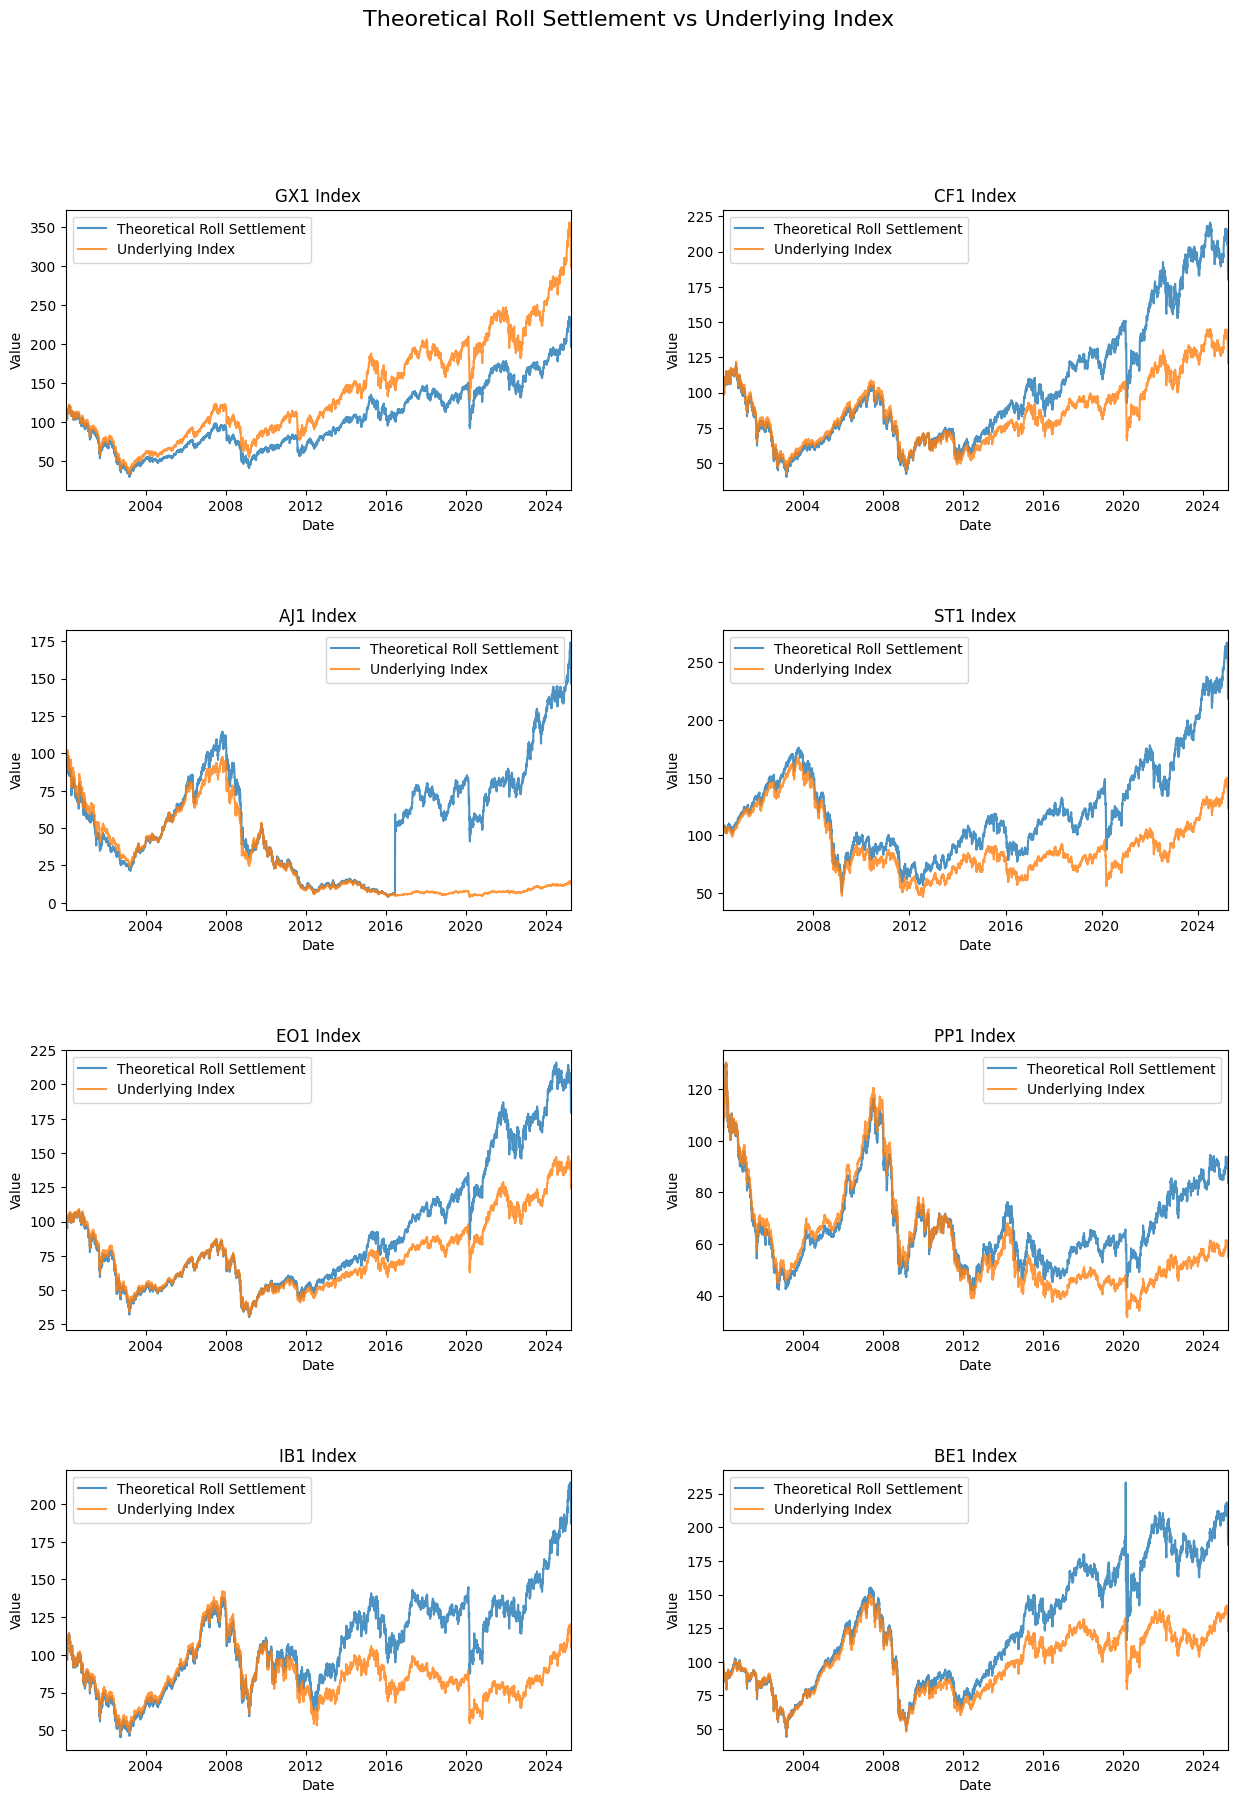

In [26]:
# Plotting the results of the theoretical roll
# VS the underlying index (fixing the start value to 100 for both)
# Each future has its own plot in a subplot
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Theoretical Roll Settlement vs Underlying Index', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for idx, (i, future) in enumerate(futures_euro_indices.items()):
    start_date = future.get_first_data_date()
    ax = axes[idx // 2, idx % 2]
    
    # Calculate multipliers to normalize both series to the same value at start_date
    roll_settle_start_value = future.roll_settle_theoretical.loc[start_date, 'Portfolio Value']
    underlying_start_value = future.underlying_data.loc[start_date]
    
    roll_settle_multiplier = 100 / roll_settle_start_value
    underlying_multiplier = 100 / underlying_start_value
    
    # Plot normalized time series
    ax.plot(future.roll_settle_theoretical.index, 
            future.roll_settle_theoretical['Portfolio Value'] * roll_settle_multiplier, 
            label='Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.underlying_data.index, 
            future.underlying_data * underlying_multiplier, 
            label='Underlying Index', alpha=0.8)
    
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

plt.show()

Here's where I copy your plot, xoxo

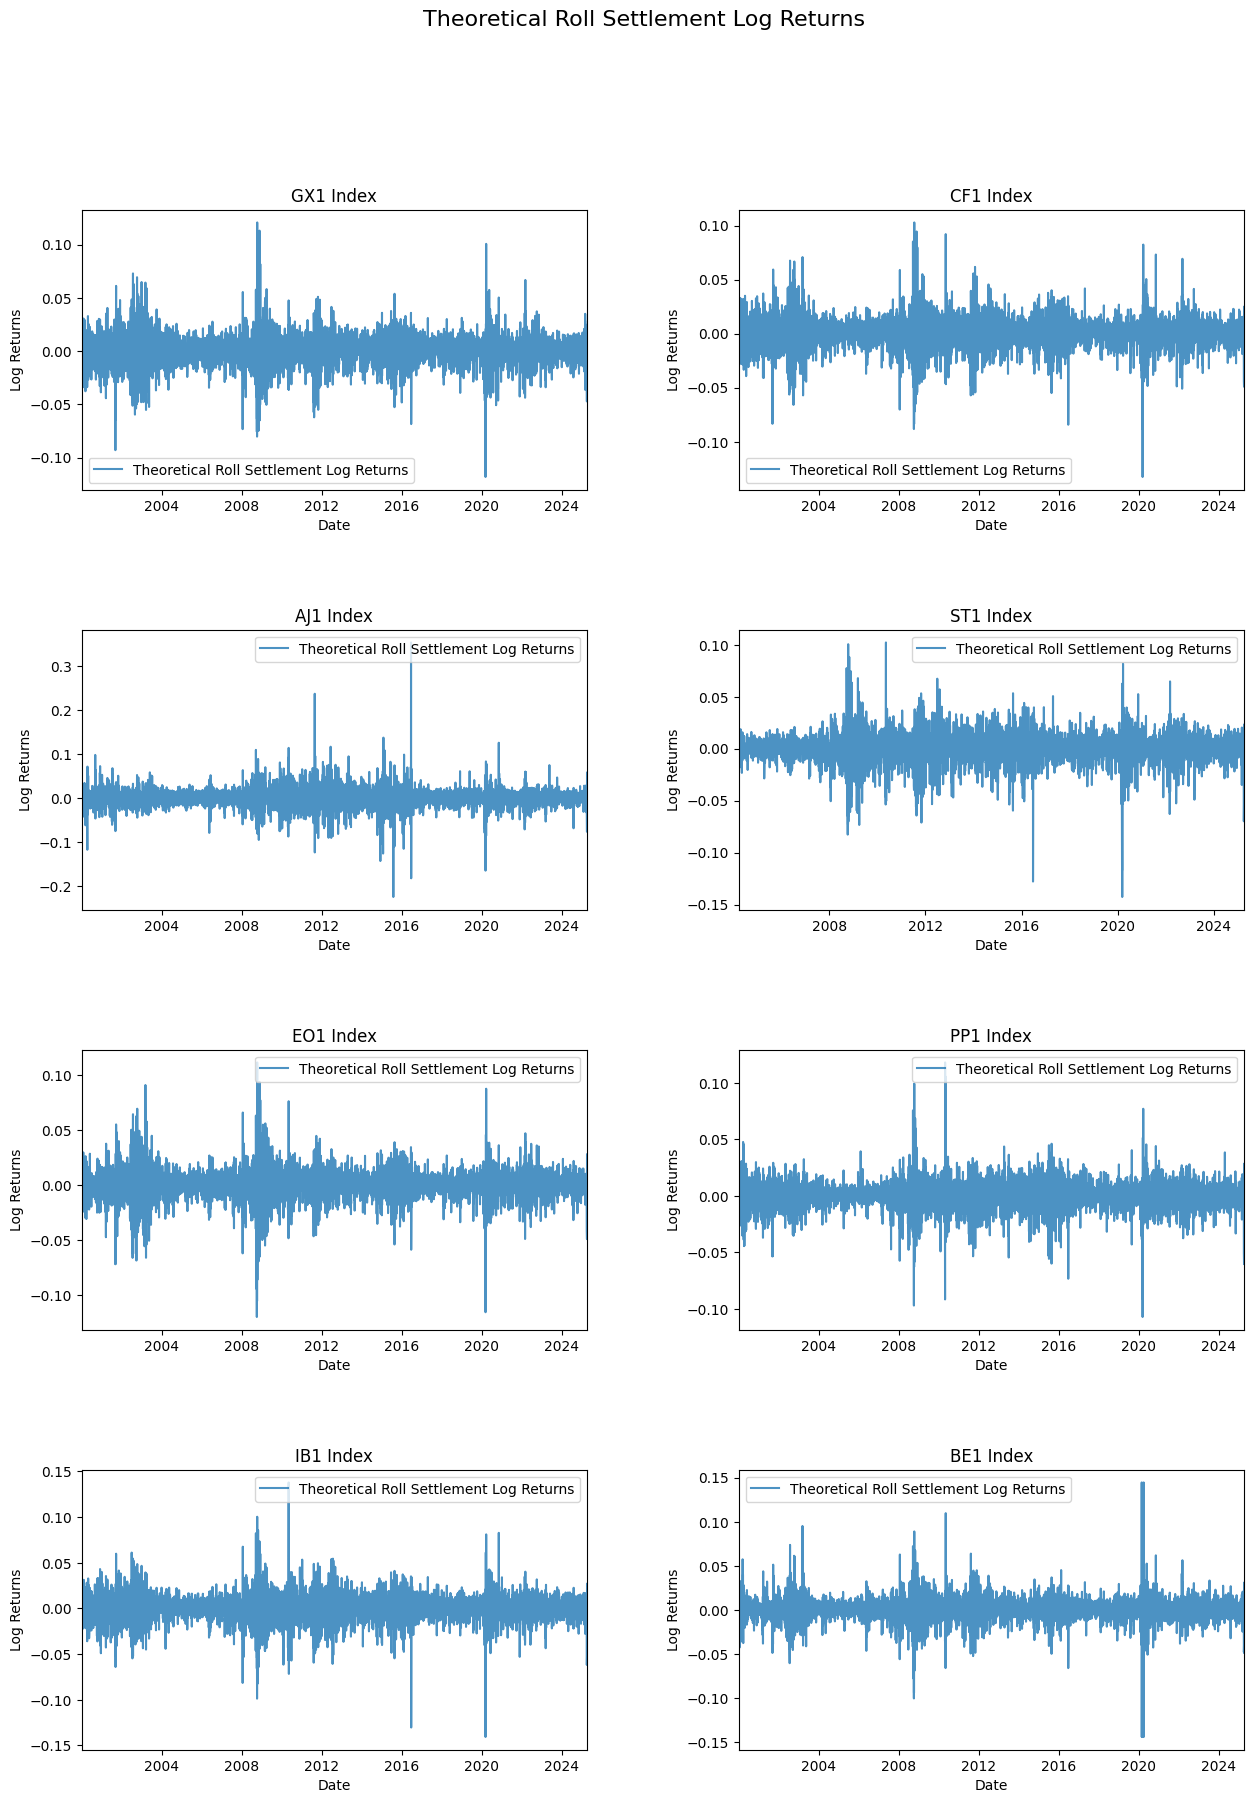

In [27]:
# Now plotting the log returns of the theoretical roll
# If the return is too high (more than 6 standard deviations), we just don't plot it
# Each future has its own plot in a subplot
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Theoretical Roll Settlement Log Returns', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for idx, (i, future) in enumerate(futures_euro_indices.items()):
        ax = axes[idx // 2, idx % 2]
        nbsd = 10
        sd = future.roll_settle_theoretical['Log Returns'].std()
        ub = future.roll_settle_theoretical['Log Returns'].mean() + nbsd * sd
        lb = future.roll_settle_theoretical['Log Returns'].mean() - nbsd * sd
        
        # Filter the data by capping values outside the bounds
        data = future.roll_settle_theoretical['Log Returns'].clip(lower=lb, upper=ub)
        
        ax.plot(future.roll_settle_theoretical.index, data, label='Theoretical Roll Settlement Log Returns', alpha=0.8)
        ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
        ax.set_title(future.name)
        ax.set_xlabel('Date')
        ax.set_ylabel('Log Returns')
        ax.legend()

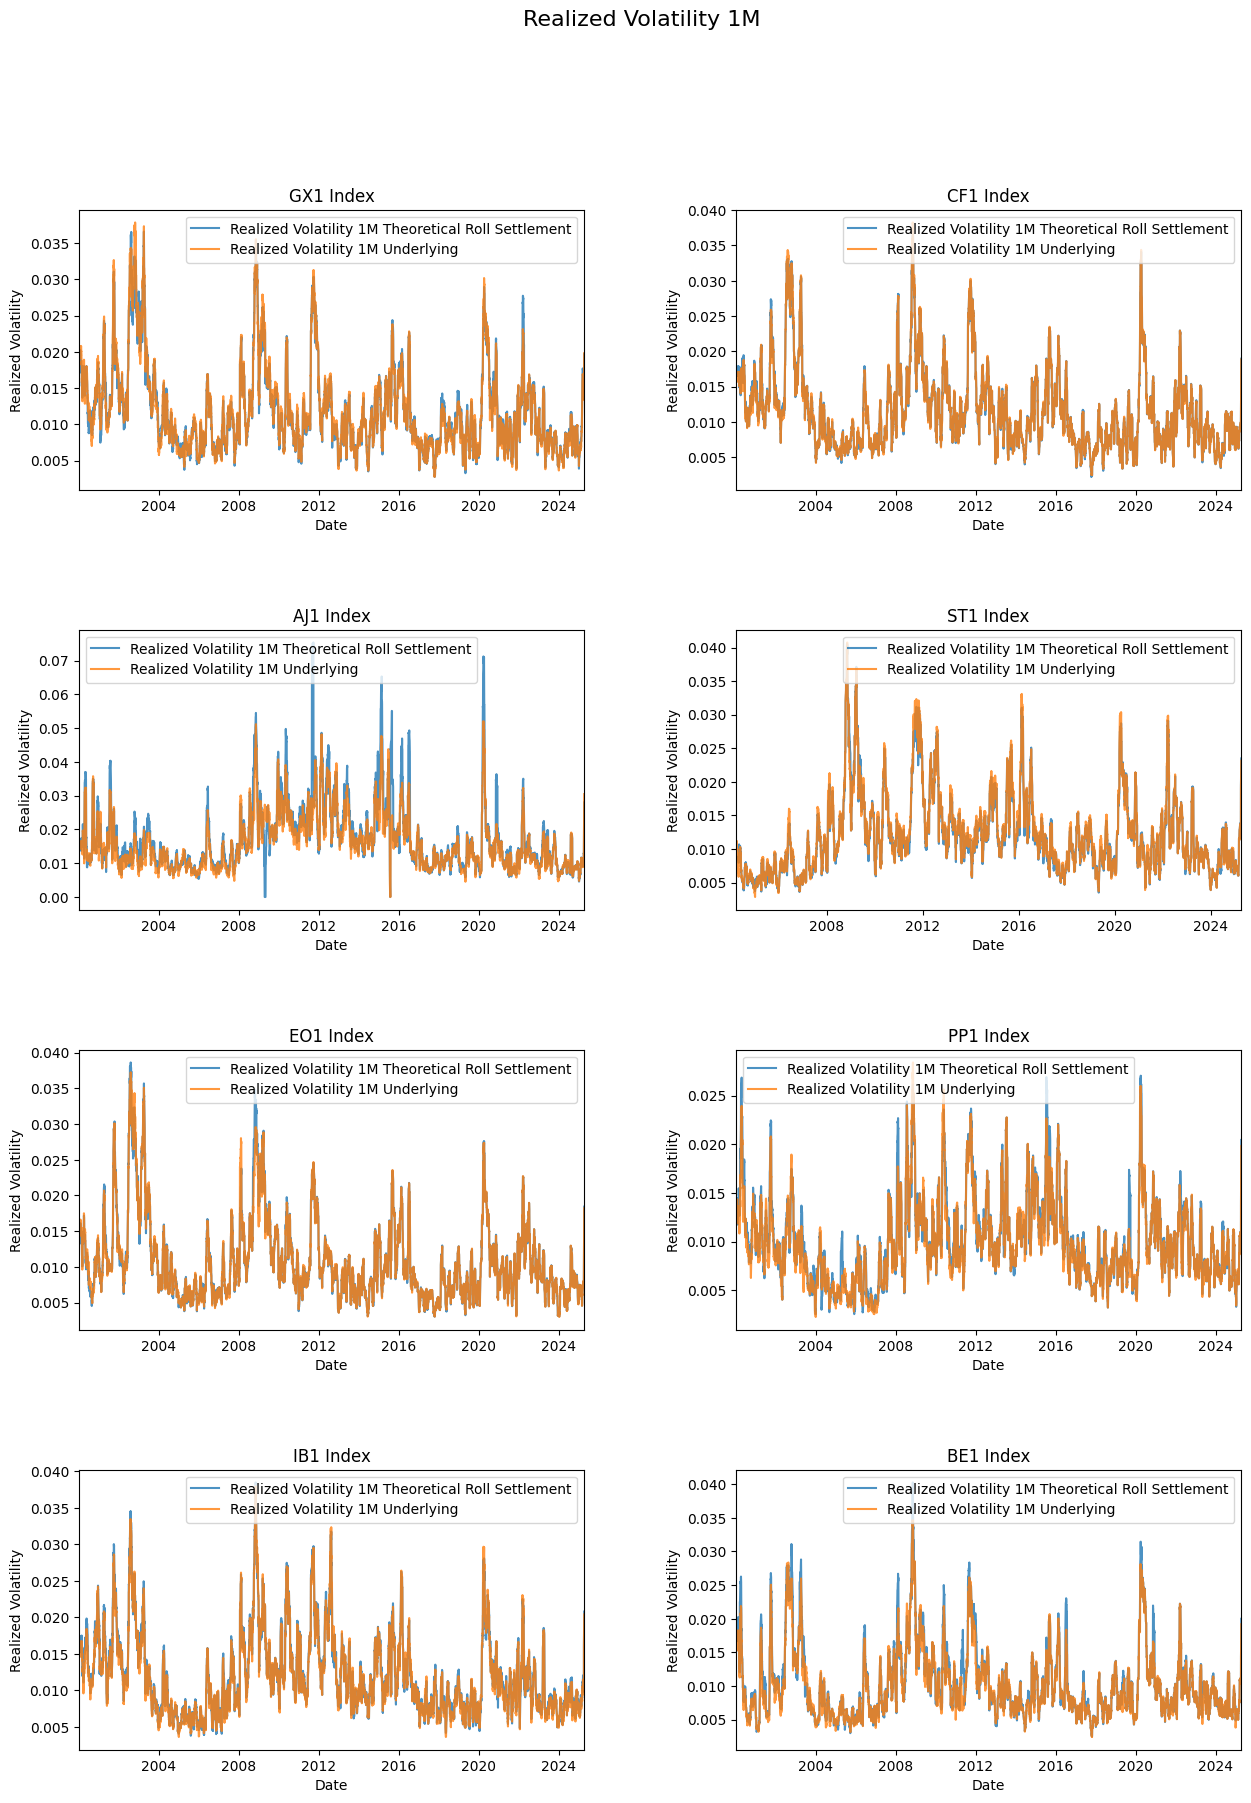

In [28]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 1M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 1M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(futures_euro_indices.items()):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_1MROLL, 
            label='Realized Volatility 1M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_1MROLL.index,
            future.realized_vol_undr_1MROLL, 
            label='Realized Volatility 1M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

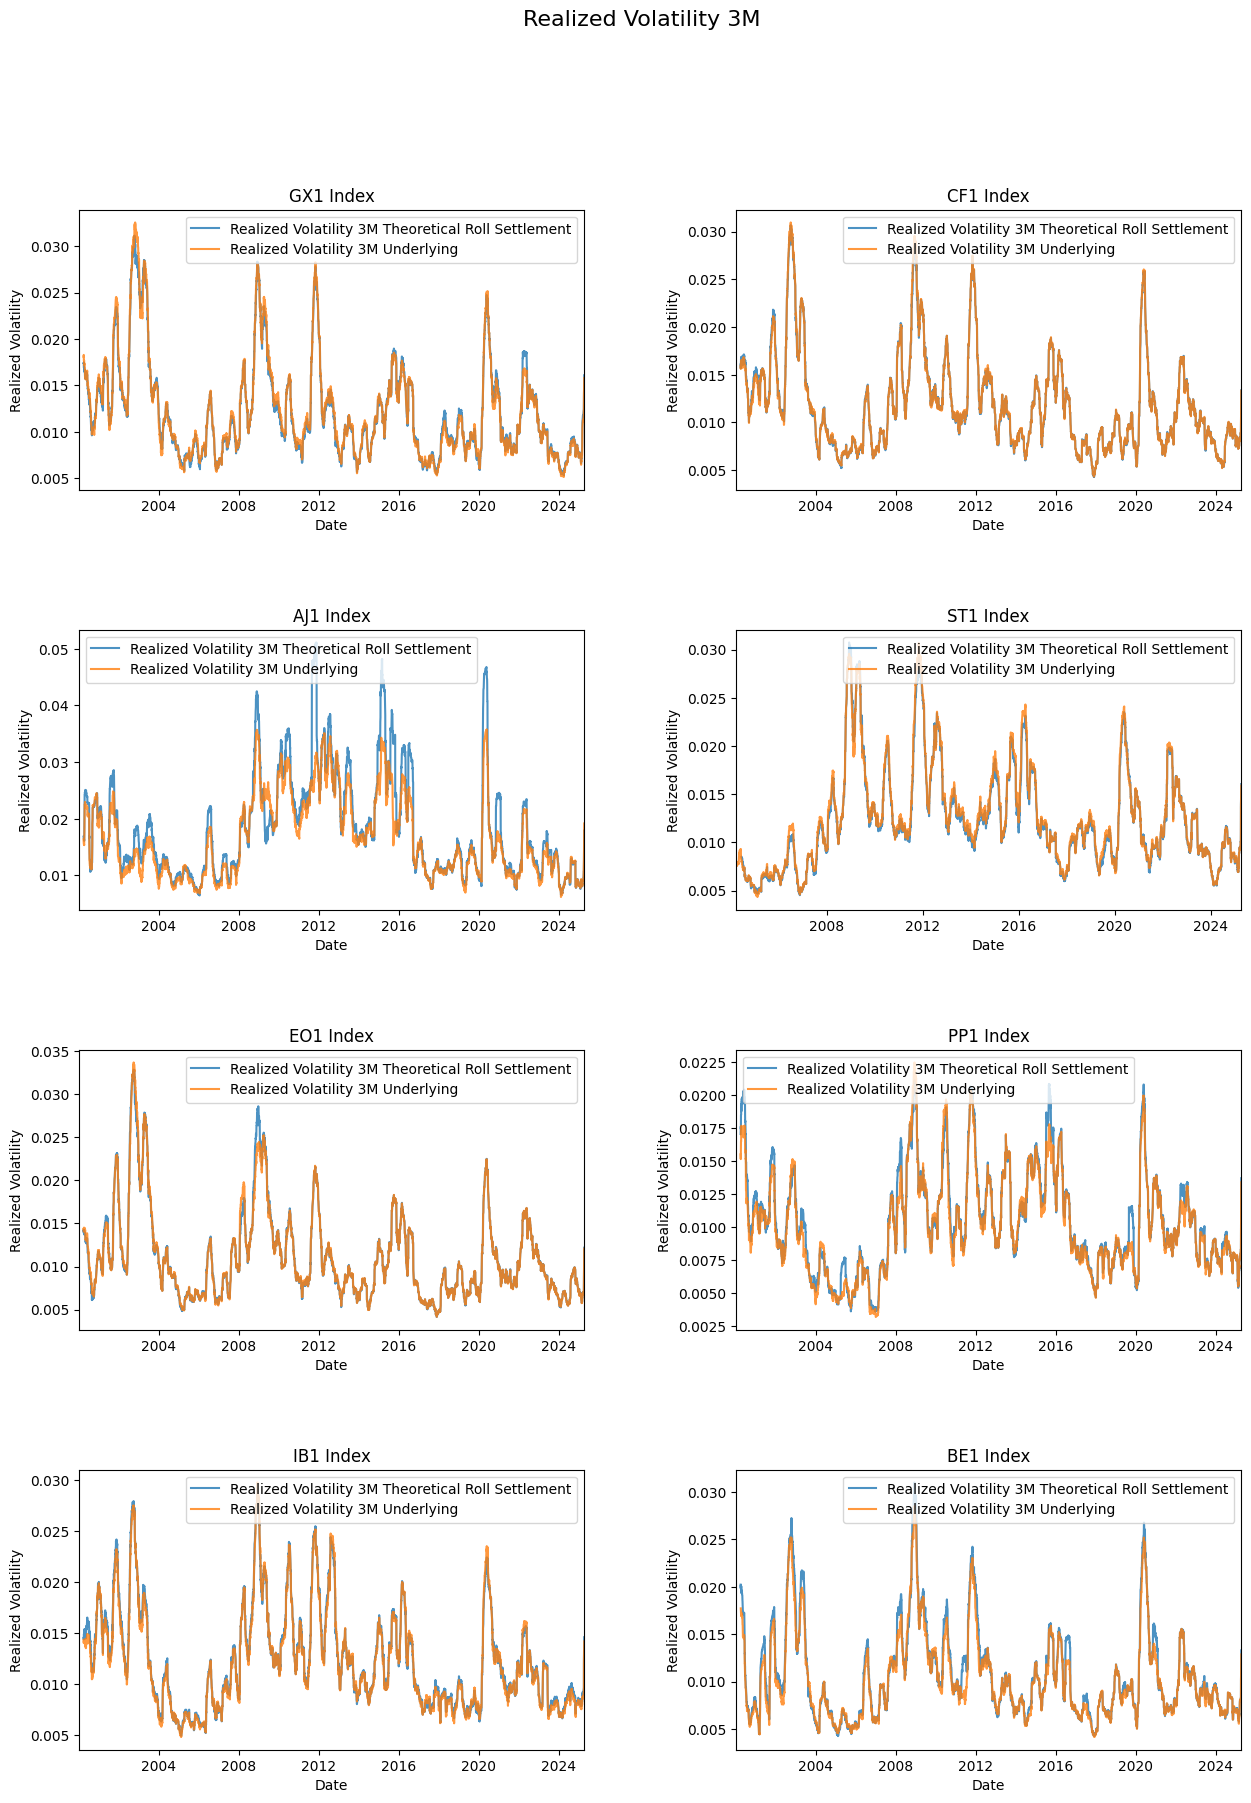

In [29]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 3M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 3M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(futures_euro_indices.items()):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_3MROLL.index,
            future.realized_vol_roll_3MROLL, 
            label='Realized Volatility 3M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_3MROLL.index,
            future.realized_vol_undr_3MROLL, 
            label='Realized Volatility 3M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

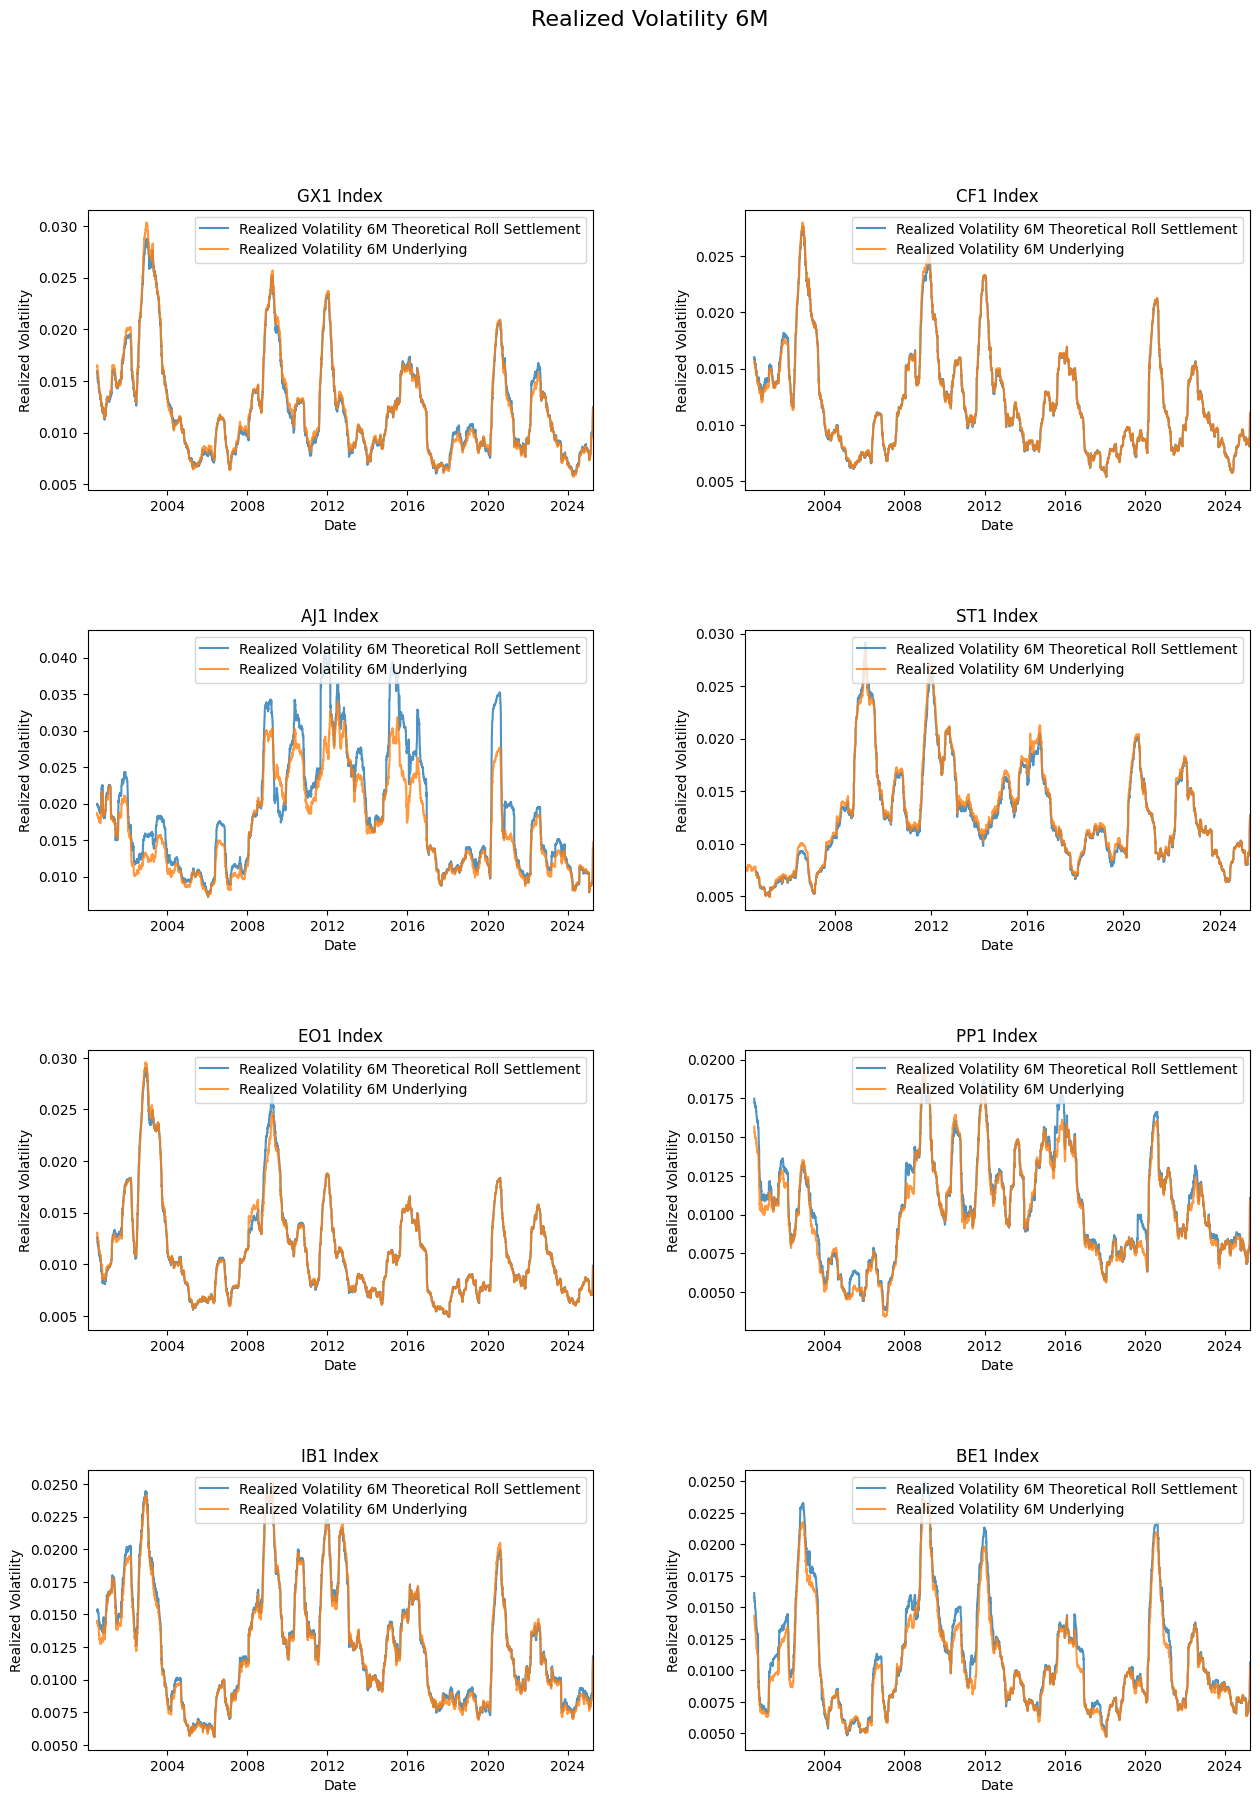

In [30]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 6M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 6M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(futures_euro_indices.items()):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_6MROLL.index,
            future.realized_vol_roll_6MROLL, 
            label='Realized Volatility 6M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_6MROLL.index,
            future.realized_vol_undr_6MROLL, 
            label='Realized Volatility 6M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

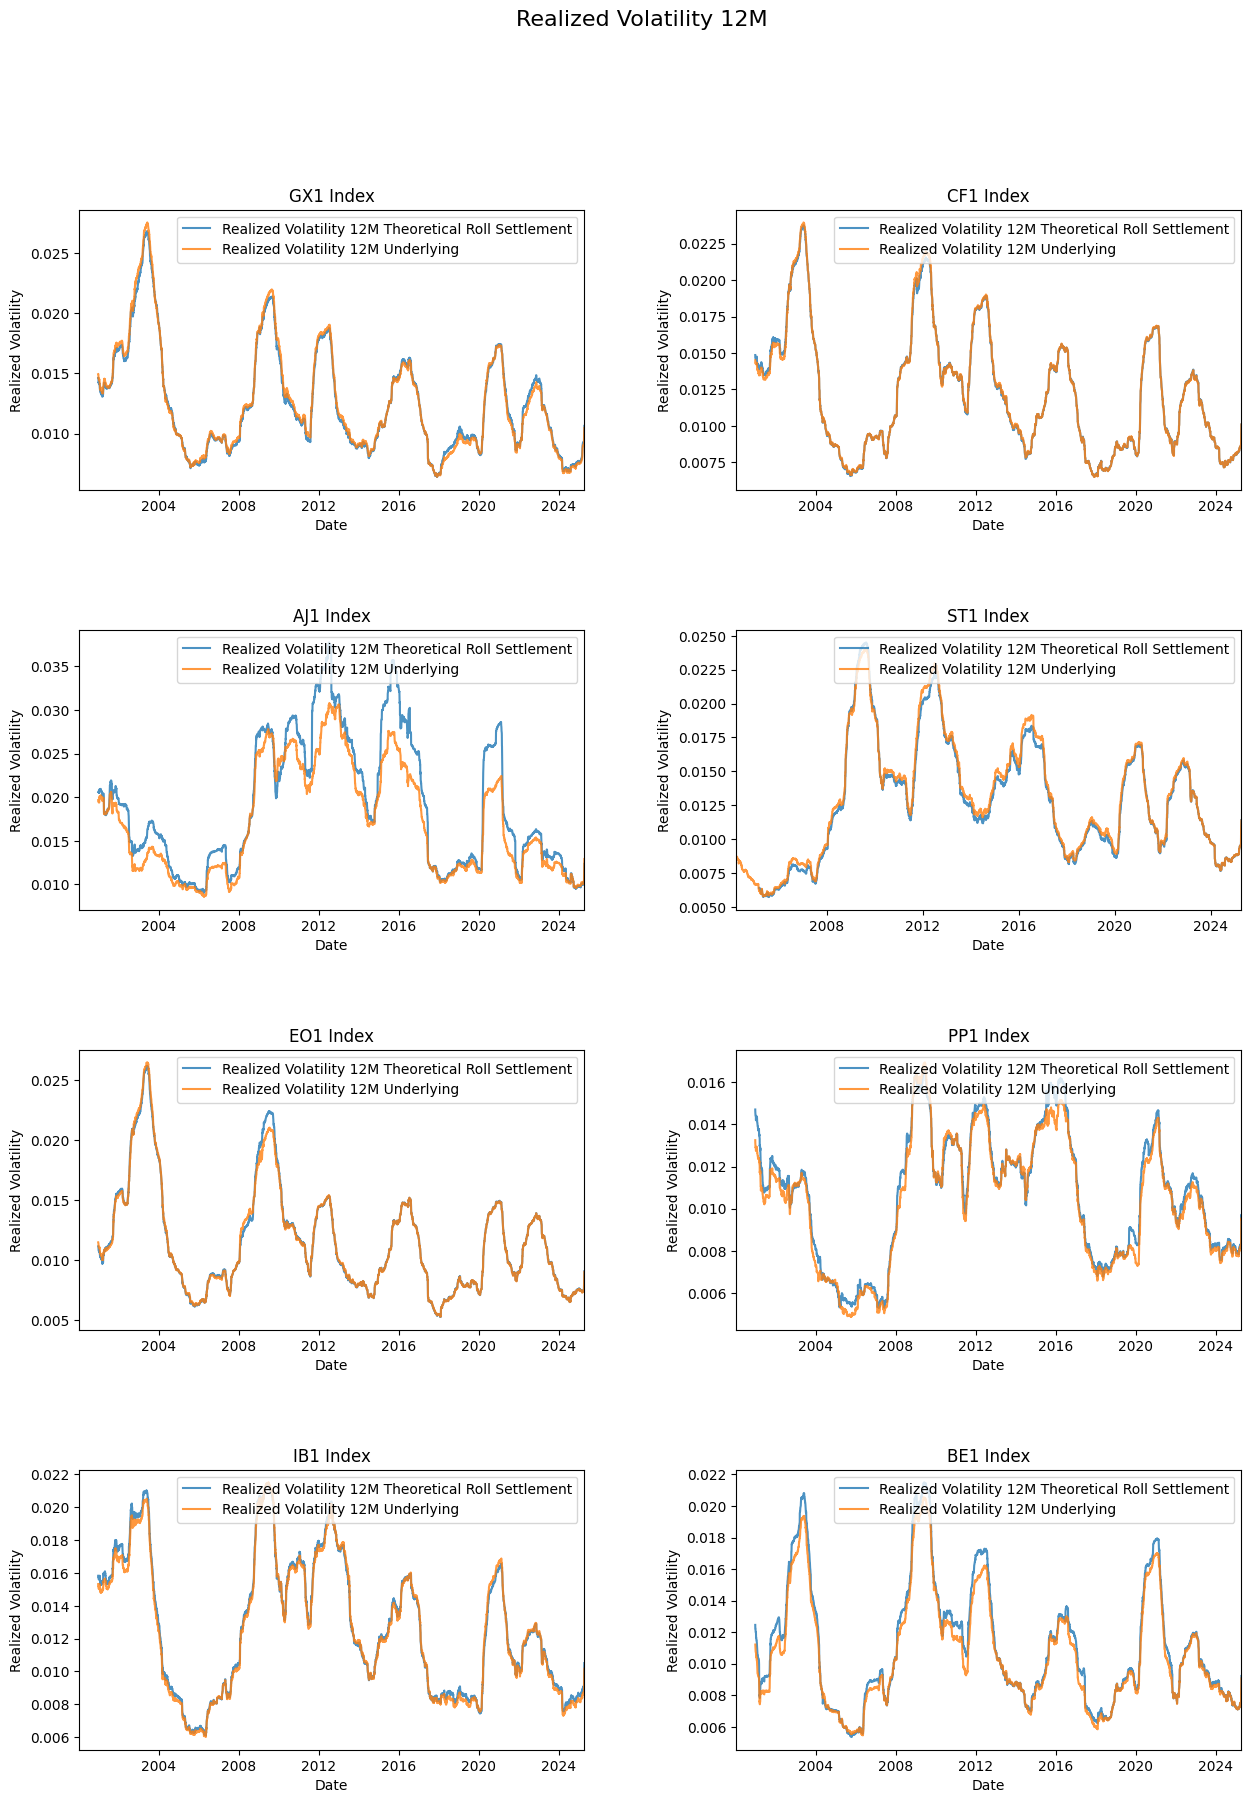

In [31]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 12M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 12M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(futures_euro_indices.items()):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL, 
            label='Realized Volatility 12M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_12MROLL.index,
            future.realized_vol_undr_12MROLL, 
            label='Realized Volatility 12M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

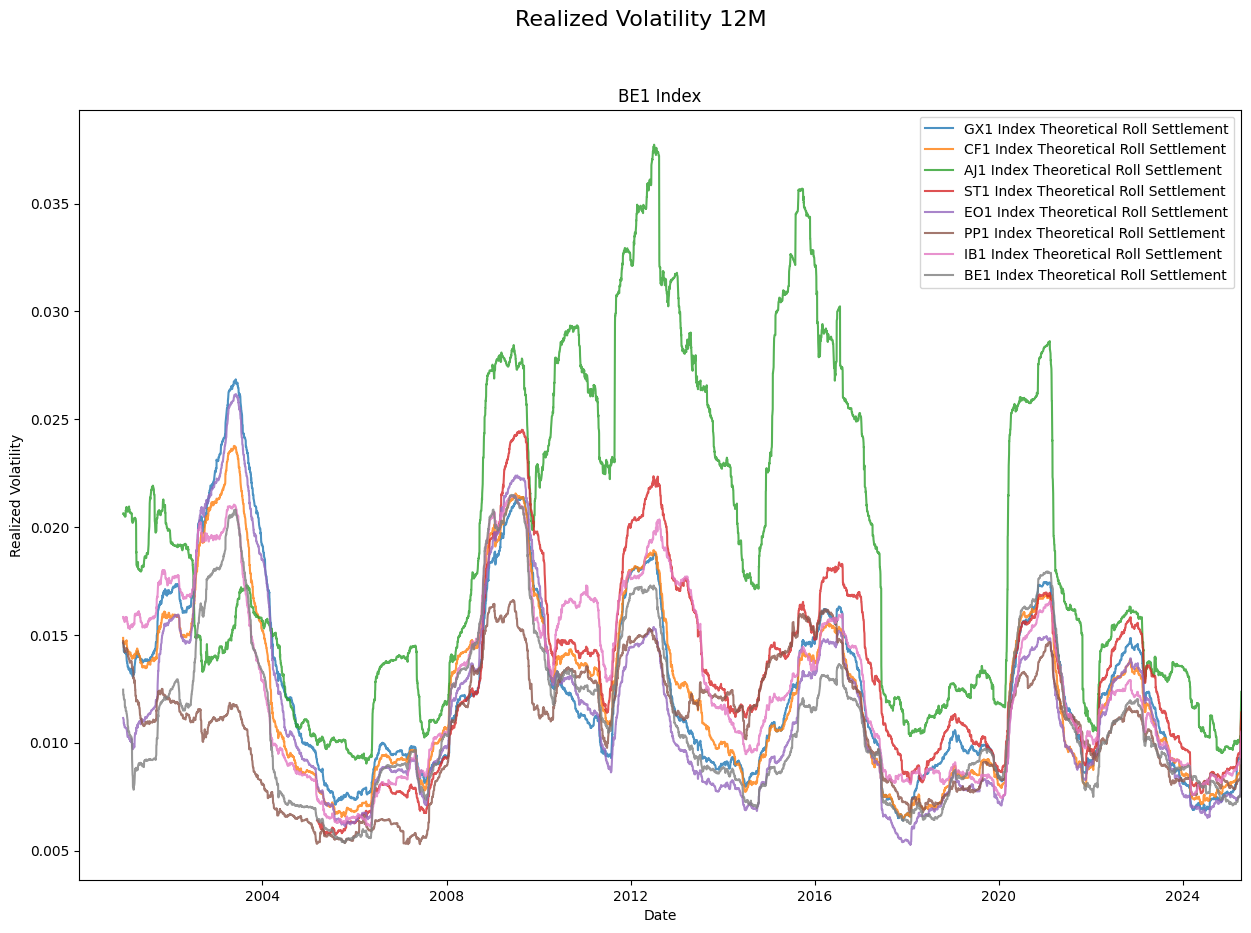

In [32]:
# Plotting all the futures realized volatilities for the roll settlement
# 12M all in one plot to compare
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Realized Volatility 12M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(futures_euro_indices.items()):
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL, 
            label=f'{future.name} Theoretical Roll Settlement', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

In [33]:
# Defining the class strategy, which is a portfolio construction strategy
# It will take futures, as an input, making it effectively the investable universe
class strategy:
    def __init__(self, name: str, futures: list, strategy_type: str = 'Equal Weight', initial_cash: float = 1000, start_date: pd.Timestamp = None, end_date: pd.Timestamp = None, rebal_at_roll = False, rebalancing_frequency: str = '3M', date_delta: int = 0, maturity_delta: int = 0):
        self.name = name
        self.futures = futures
        self.weights = {}
        self.strategy_type = strategy_type
        self.initial_cash = initial_cash
        self.start_date = start_date
        self.end_date = end_date
        self.date_delta = date_delta
        self.maturity_delta = maturity_delta
        self.rebalancing_calendar = None
        self.portfolio_value = None
        self.portfolio_realized_vol_1MROLL = None
        self.portfolio_realized_vol_3MROLL = None
        self.portfolio_realized_vol_6MROLL = None
        self.portfolio_realized_vol_12MROLL = None
        
        # Check if the strategy type is valid
        if self.strategy_type not in ['Equal Weight', 'Inverse Variance', 'Target Volatility', 'Risk Parity', 'Minimum Variance']:
            raise ValueError("Strategy type must be one of ['Equal Weight', 'Risk Parity'].")
        
        # Check if the futures are valid
        if not isinstance(self.futures, list):
            raise ValueError("Futures must be a list.")
        
        # Checking it the values of the futures are valid
        for future in self.futures:
            if not isinstance(future, euroindex_future):
                raise ValueError("Futures must be of type euroindex_future.")
            
        # Checking if the roll_settle_theoretical is built and the realized volatilities are built (on the roll_settle_theoretical)
        for future in self.futures:
            if future.roll_settle_theoretical is None:
                raise ValueError("Roll settlement must be built before building the strategy.")
            if future.realized_vol_roll_1MROLL is None:
                raise ValueError("Realized volatility must be built before building the strategy.")
            if future.realized_vol_roll_3MROLL is None:
                raise ValueError("Realized volatility must be built before building the strategy.")
            if future.realized_vol_roll_6MROLL is None:
                raise ValueError("Realized volatility must be built before building the strategy.")
            if future.realized_vol_roll_12MROLL is None:
                raise ValueError("Realized volatility must be built before building the strategy.")
        
        # Check if the initial cash is valid
        if not isinstance(initial_cash, (int, float)):
            raise ValueError("Initial cash must be a number.")
        
        if initial_cash <= 0:
            raise ValueError("Initial cash must be positive.")
        
        def get_first_common_date(futures):
            """
            Get the first common date for all futures.
            """
            first_dates = [future.get_first_data_date() for future in futures]
            return max(first_dates)
        
        def get_last_common_date(futures):
            """
            Get the last common date for all futures.
            """
            last_dates = [future.get_last_data_date() for future in futures]
            return min(last_dates)
        
        if start_date is not None:
            try:
                start_date = pd.to_datetime(start_date)
            except ValueError:
                raise ValueError("Start date must be in datetime format.")
            first_common_date = get_first_common_date(self.futures)
            if start_date < first_common_date:
                raise ValueError(f"Start date must be after the first common date of the futures: {first_common_date}.")
            if start_date > self.end_date:
                raise ValueError(f"Start date must be before the end date of the futures: {self.end_date}.")
        else:
            start_date = get_first_common_date(self.futures)
        self.start_date = start_date

        if end_date is not None:
            try:
                end_date = pd.to_datetime(end_date)
            except ValueError:
                raise ValueError("End date must be in datetime format.")
            last_common_date = get_last_common_date(self.futures)
            if end_date < self.start_date:
                raise ValueError(f"End date must be after the start date of the futures: {self.start_date}.")
            if end_date > last_common_date:
                raise ValueError(f"End date must be before the last common date of the futures: {last_common_date}.")
        else:
            end_date = get_last_common_date(self.futures)
        self.end_date = end_date
    
    def get_all_dates(self):
        """
        Get all the dates for the data of the future settlement.
        The date is in datetime format.
        """
        all_dates = []
        for future in self.futures:
            all_dates += future.get_all_dates()
        all_dates = list(set(all_dates))
        all_dates = pd.to_datetime(all_dates)
        return all_dates
        
    def build_rebalancing_calendar(self, start_date, end_date, rebal_at_roll: bool = False, rebalancing_frequency: str = '3M'):
        """
        Build a rebalancing calendar for the strategy.
        The rebalancing frequency is in months.
        """
        if not rebal_at_roll and rebalancing_frequency not in ['1M', '3M', '6M', '12M']:
            raise ValueError("Rebalancing frequency must be one of ['1M', '3M', '6M', '12M'].")
        
        if rebal_at_roll:
            # TODO: Implement the rebalancing at roll
            # Might be tricky since with equity indices the roll is not always the same day
            raise NotImplementedError("Rebalancing at roll is not implemented yet.")
        else:
            if rebalancing_frequency == '1M':
                rebalancing_dates = pd.date_range(start=start_date, end=end_date, freq='BM')
            elif rebalancing_frequency == '3M':
                rebalancing_dates = pd.date_range(start=start_date, end=end_date, freq='3BM')
            elif rebalancing_frequency == '6M':
                rebalancing_dates = pd.date_range(start=start_date, end=end_date, freq='6BM')
            elif rebalancing_frequency == '12M':
                rebalancing_dates = pd.date_range(start=start_date, end=end_date, freq='12BM')
        
        # Making sure all the rebalancing dates are in the dates of the futures
        # If not, we will rebalance the next available date within the future dates
        dates_futures = []
        for future in self.futures:
            dates_futures += future.get_all_dates()
        dates_futures = list(set(dates_futures))
        dates_futures.sort()
        rebalancing_dates = pd.to_datetime(rebalancing_dates)
        for date in rebalancing_dates:
            if date not in dates_futures:
                # Find the next available date
                if [dates_futures] == []:
                    raise ValueError(f"Rebalancing date {date} is not in the future dates.")
                elif [d for d in dates_futures if d > date] == []:
                    # We do nothing (?)
                    pass
                else:
                    next_date = min([d for d in dates_futures if d > date])
                    rebalancing_dates[rebalancing_dates == date] = next_date
        self.rebalancing_calendar = rebalancing_dates
        return rebalancing_dates
    
    def build_weights(self, strategy_type: str = 'Equal Weight'):
        """
        Build the weights for the strategy.
        The weights are in percentage.
        """
        weights = {}
        if strategy_type == 'Equal Weight':
            weight = 1 / len(self.futures)
            for future in self.futures:
                weights[future.name] = weight
        else:
            # TODO: Implement the other strategies
            raise NotImplementedError("Other strategies are not implemented yet.")
        self.weights = weights
        return weights
        
    def simulate_strategy(self, initial_cash: float = 1000, date_delta: int = 0, maturity_delta: int = 0, start_date: pd.Timestamp = None, end_date: pd.Timestamp = None, strategy_type: str = 'Equal Weight'):
        """
        Simulate the strategy.
        The date is in datetime format.
        The date_delta is the number of days to add to the date. This is useful if we want to roll before the maturity date.
        So the effective contract we can invest in is the one that is the closest to the date + date_delta.
        The maturity_delta can be used to get not the first next contract, but the secont, third, etc. contract (this is done with maturity_delta).
        """
        if start_date is None:
            start_date = self.get_first_data_date()
        if end_date is None:
            end_date = self.get_last_data_date()
        
        # Check that the dates are in datetime format
        try:
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)
        except ValueError:
            raise ValueError("Start date and end date must be in datetime format.")
        
        # Checking if start_date is before end_date
        if start_date > end_date:
            raise ValueError("Start date must be before end date.")
        
        dates = self.get_all_dates()
        dates = dates[(dates >= start_date) & (dates <= end_date)]  # Filter dates
        dates = dates.sort_values()
        
        # Building the rebalancing calendar
        rebalancing_dates = self.rebalancing_calendar
        rebalancing_dates = rebalancing_dates[(rebalancing_dates >= start_date) & (rebalancing_dates <= end_date)]
        
        # Creating a dataframe to store the values of the portfolio in a dictionary
        portfolio_simulation = {}
        portfolio_simulation['Overall portfolio'] = pd.DataFrame(index=dates, columns=['Portfolio Value'])
        portfolio_simulation['Overall portfolio']['Portfolio Value'] = np.nan
        portfolio_simulation['Overall portfolio']['Transaction boolean'] = np.nan
        portfolio_simulation['Overall portfolio']['Rolled boolean'] = np.nan
        portfolio_simulation['Overall portfolio']['Rebalanced boolean'] = np.nan
        for future in self.futures:
            portfolio_simulation[future.name] = pd.DataFrame(index=dates, columns=['Position Value'])
            portfolio_simulation[future.name]['Position Value'] = np.nan
            portfolio_simulation[future.name]['Transaction'] = np.nan
            portfolio_simulation[future.name]['Transaction boolean'] = np.nan
            portfolio_simulation[future.name]['Contract'] = np.nan
            portfolio_simulation[future.name]['Number of Contracts'] = np.nan
            portfolio_simulation[future.name]['Contract PX_SETTLE'] = np.nan
            portfolio_simulation[future.name]['Rolled boolean'] = np.nan
            portfolio_simulation[future.name]['Rebalanced boolean'] = np.nan
        
        for date in dates:
            date_index = dates.get_loc(date)
            if date == start_date:
                weights = self.build_weights(strategy_type)
                portfolio_simulation['Overall portfolio'].loc[date, 'Portfolio Value'] = initial_cash
                portfolio_simulation['Overall portfolio'].loc[date, 'Transaction boolean'] = True
                portfolio_simulation['Overall portfolio'].loc[date, 'Rolled boolean'] = False
                portfolio_simulation['Overall portfolio'].loc[date, 'Rebalanced boolean'] = False
                for future in self.futures:
                    contract = future.get_next_maturity_contract(date, date_delta, maturity_delta)
                    px_settle = contract.PX_SETTLE.loc[date]
                    no_contracts = (weights[future.name] * initial_cash) / px_settle
                    position_value = no_contracts * px_settle
                    
                    portfolio_simulation[future.name].loc[date, 'Position Value'] = position_value
                    portfolio_simulation[future.name].loc[date, 'Transaction'] = f'{no_contracts:.2f} contracts bought at {px_settle:.2f}, totalling {position_value:.2f}'
                    portfolio_simulation[future.name].loc[date, 'Contract'] = contract.name
                    portfolio_simulation[future.name].loc[date, 'Number of Contracts'] = no_contracts
                    portfolio_simulation[future.name].loc[date, 'Contract PX_SETTLE'] = px_settle
                    portfolio_simulation[future.name].loc[date, 'Transaction boolean'] = True
                    portfolio_simulation[future.name].loc[date, 'Rolled boolean'] = False
                    portfolio_simulation[future.name].loc[date, 'Rebalanced boolean'] = False
            else:
                # Valuing the porfolio at the beginning of the day
                yesterday = dates[date_index - 1]
                value = 0
                for future in self.futures:
                    position_value = portfolio_simulation[future.name].loc[yesterday, 'Number of Contracts'] * portfolio_simulation[future.name].loc[yesterday, 'Contract PX_SETTLE']
                    value += position_value
                portfolio_simulation['Overall portfolio'].loc[date, 'Portfolio Value'] = value
                portfolio_simulation['Overall portfolio'].loc[date, 'Transaction boolean'] = False
                portfolio_simulation['Overall portfolio'].loc[date, 'Rolled boolean'] = False
                portfolio_simulation['Overall portfolio'].loc[date, 'Rebalanced boolean'] = False
                                    
                for future in self.futures:
                     # We are not rolling the contract, we just value it
                    position_value = portfolio_simulation[future.name].loc[yesterday, 'Number of Contracts'] * future.get_next_maturity_contract(date, date_delta, maturity_delta).PX_SETTLE.loc[date]
                    portfolio_simulation[future.name].loc[date, 'Position Value'] = position_value
                    portfolio_simulation[future.name].loc[date, 'Transaction boolean'] = False
                    portfolio_simulation[future.name].loc[date, 'Contract'] = portfolio_simulation[future.name].loc[yesterday, 'Contract']
                    portfolio_simulation[future.name].loc[date, 'Number of Contracts'] = portfolio_simulation[future.name].loc[yesterday, 'Number of Contracts']
                    portfolio_simulation[future.name].loc[date, 'Contract PX_SETTLE'] = future.get_next_maturity_contract(date, date_delta, maturity_delta).PX_SETTLE.loc[date]
                    portfolio_simulation[future.name].loc[date, 'Rolled boolean'] = False
                    portfolio_simulation[future.name].loc[date, 'Rebalanced boolean'] = False
                    if future.is_maturity_date(date, date_delta):
                        # We'll roll the contract - Notice we don't rebalance the portfolio, we just roll the contract
                        exiting_contract = portfolio_simulation[future.name].loc[yesterday, 'Contract']
                        exiting_contract_px_settle = future.get_next_maturity_contract(yesterday, date_delta, maturity_delta).PX_SETTLE.loc[date]
                        exiting_contract_no_contracts = portfolio_simulation[future.name].loc[yesterday, 'Number of Contracts']
                        exiting_contract_value = exiting_contract_no_contracts * exiting_contract_px_settle
                        position_value = exiting_contract_value
                        incoming_contract = future.get_next_maturity_contract(date, date_delta, maturity_delta)
                        incoming_contract_px_settle = incoming_contract.PX_SETTLE.loc[date]
                        incoming_contract_no_contracts = position_value / incoming_contract_px_settle
                        
                        portfolio_simulation[future.name].loc[date, 'Position Value'] = position_value
                        portfolio_simulation[future.name].loc[date, 'Transaction'] = f'Rolling: {incoming_contract_no_contracts:.2f} contracts {incoming_contract.name} bought at {incoming_contract_px_settle:.2f}, totalling {position_value:.2f} and {exiting_contract_no_contracts:.2f} contracts {exiting_contract} sold at {exiting_contract_px_settle:.2f}, totalling {exiting_contract_value:.2f}'
                        portfolio_simulation[future.name].loc[date, 'Contract'] = incoming_contract.name
                        portfolio_simulation[future.name].loc[date, 'Number of Contracts'] = incoming_contract_no_contracts
                        portfolio_simulation[future.name].loc[date, 'Contract PX_SETTLE'] = incoming_contract_px_settle
                        portfolio_simulation[future.name].loc[date, 'Transaction boolean'] = True
                        portfolio_simulation[future.name].loc[date, 'Rolled boolean'] = True
                        
                        portfolio_simulation['Overall portfolio'].loc[date, 'Transaction boolean'] = True
                        portfolio_simulation['Overall portfolio'].loc[date, 'Rolled boolean'] = True

                        
                
                if date in rebalancing_dates:
                    # Rebalancing the porftolio. This overrides some of the previous values
                    weights = self.build_weights(strategy_type)
                    for future in self.futures:
                        # Exiting position
                        exiting_position = portfolio_simulation[future.name].loc[yesterday, 'Contract']
                        exiting_position_px_settle = portfolio_simulation[future.name].loc[date, 'Contract PX_SETTLE']
                        exiting_position_no_contracts = portfolio_simulation[future.name].loc[yesterday, 'Number of Contracts']
                        exiting_position_value = exiting_position_no_contracts * exiting_position_px_settle
                        # Incoming position
                        contract = future.get_next_maturity_contract(date, date_delta, maturity_delta)
                        px_settle = contract.PX_SETTLE.loc[date]
                        no_contracts = (weights[future.name] * portfolio_simulation['Overall portfolio'].loc[date, 'Portfolio Value']) / px_settle
                        position_value = no_contracts * px_settle
                        portfolio_simulation[future.name].loc[date, 'Position Value'] = position_value
                        portfolio_simulation[future.name].loc[date, 'Transaction'] = f'Rebalancing: {no_contracts:.2f} contracts {contract.name} bought at {px_settle:.2f}, totalling {position_value:.2f} and {exiting_position_no_contracts:.2f} contracts {exiting_position} sold at {exiting_position_px_settle:.2f}, totalling {exiting_position_value:.2f}'
                        portfolio_simulation[future.name].loc[date, 'Contract'] = contract.name
                        portfolio_simulation[future.name].loc[date, 'Number of Contracts'] = no_contracts
                        portfolio_simulation[future.name].loc[date, 'Contract PX_SETTLE'] = px_settle
                        portfolio_simulation[future.name].loc[date, 'Transaction boolean'] = True
                        portfolio_simulation[future.name].loc[date, 'Rebalanced boolean'] = True
                        
                        portfolio_simulation['Overall portfolio'].loc[date, 'Transaction boolean'] = True
                        portfolio_simulation['Overall portfolio'].loc[date, 'Rebalanced boolean'] = True
                        
        return portfolio_simulation
    # self.portfolio_simulation = simulate_strategy(self, initial_cash, date_delta, maturity_delta, start_date, end_date, strategy_type)

In [34]:
# Testing the strategy class with all the futures we've built
# Except for Greece and Belgium because of anomalies in the data
equal_weighted_test = strategy(name='Equal Weighted Test', futures=[futures_euroindex_GX1, futures_euroindex_CF1, futures_euroindex_ST1, futures_euroindex_EO1, futures_euroindex_PP1, futures_euroindex_IB1], strategy_type='Equal Weight', initial_cash=1000, rebal_at_roll=False, rebalancing_frequency='3M')
equal_weighted_test.build_rebalancing_calendar(start_date = equal_weighted_test.start_date, end_date = equal_weighted_test.end_date, rebal_at_roll = False, rebalancing_frequency = '3M')
print(equal_weighted_test.rebalancing_calendar)

DatetimeIndex(['2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-30',
               '2006-03-31', '2006-06-30', '2006-09-29', '2006-12-29',
               '2007-03-30', '2007-06-29', '2007-09-28', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-30',
               '2012-03-30', '2012-06-29', '2012-09-28', '2012-12-31',
               '2013-03-29', '2013-06-28', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-30',
               '2017-03-31', '2017-06-30', '2017-09-29', '2017-12-29',
      

/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/682302931.py:124: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  rebalancing_dates = pd.date_range(start=start_date, end=end_date, freq='3BM')


In [35]:
# Testing building the weights
equal_weighted_test.build_weights(strategy_type='Equal Weight')
print(equal_weighted_test.weights)
print(len(equal_weighted_test.futures))
print(equal_weighted_test.futures[0].name)

{'GX1 Index': 0.16666666666666666, 'CF1 Index': 0.16666666666666666, 'ST1 Index': 0.16666666666666666, 'EO1 Index': 0.16666666666666666, 'PP1 Index': 0.16666666666666666, 'IB1 Index': 0.16666666666666666}
6
GX1 Index


In [36]:
# Simulating the strategy
portfolio_simulation = equal_weighted_test.simulate_strategy(initial_cash=1000, date_delta=10, maturity_delta=0, start_date=equal_weighted_test.start_date, end_date=equal_weighted_test.end_date, strategy_type='Equal Weight')

/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/682302931.py:223: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  portfolio_simulation['Overall portfolio'].loc[date, 'Transaction boolean'] = True
/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/682302931.py:224: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  portfolio_simulation['Overall portfolio'].loc[date, 'Rolled boolean'] = False
/var/folders/yq/mk_xyzlx04ndbj11dcxpw94m0000gn/T/ipykernel_1298/682302931.py:225: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has d

In [37]:
# For all futures, printing the first position value
for future in equal_weighted_test.futures:
    print(future.name)
    print(portfolio_simulation[future.name].iloc[0]['Transaction'])
    print(portfolio_simulation[future.name].iloc[0]['Position Value'])

GX1 Index
0.04 contracts bought at 3747.00, totalling 166.67
166.66666666666666
CF1 Index
0.05 contracts bought at 3541.50, totalling 166.67
166.66666666666666
ST1 Index
0.01 contracts bought at 25720.00, totalling 166.67
166.66666666666666
EO1 Index
0.51 contracts bought at 328.80, totalling 166.67
166.66666666666666
PP1 Index
0.02 contracts bought at 7544.00, totalling 166.67
166.66666666666666
IB1 Index
0.02 contracts bought at 7763.00, totalling 166.67
166.66666666666666


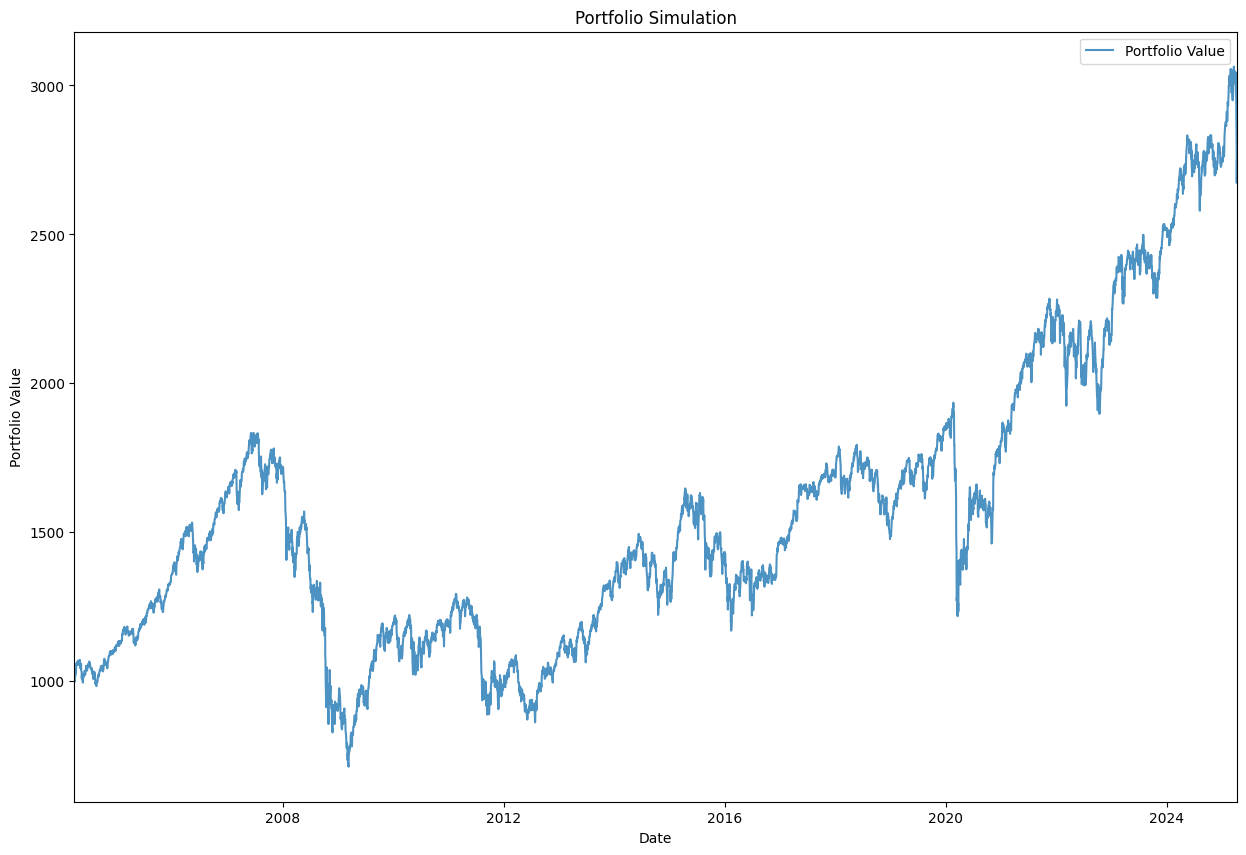

In [38]:
# Plotting the portfolio simulation
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(portfolio_simulation['Overall portfolio'].index, portfolio_simulation['Overall portfolio']['Portfolio Value'], label='Portfolio Value', alpha=0.8)
ax.set_xlim([portfolio_simulation['Overall portfolio'].index[0], portfolio_simulation['Overall portfolio'].index[-1]])
ax.set_title('Portfolio Simulation')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

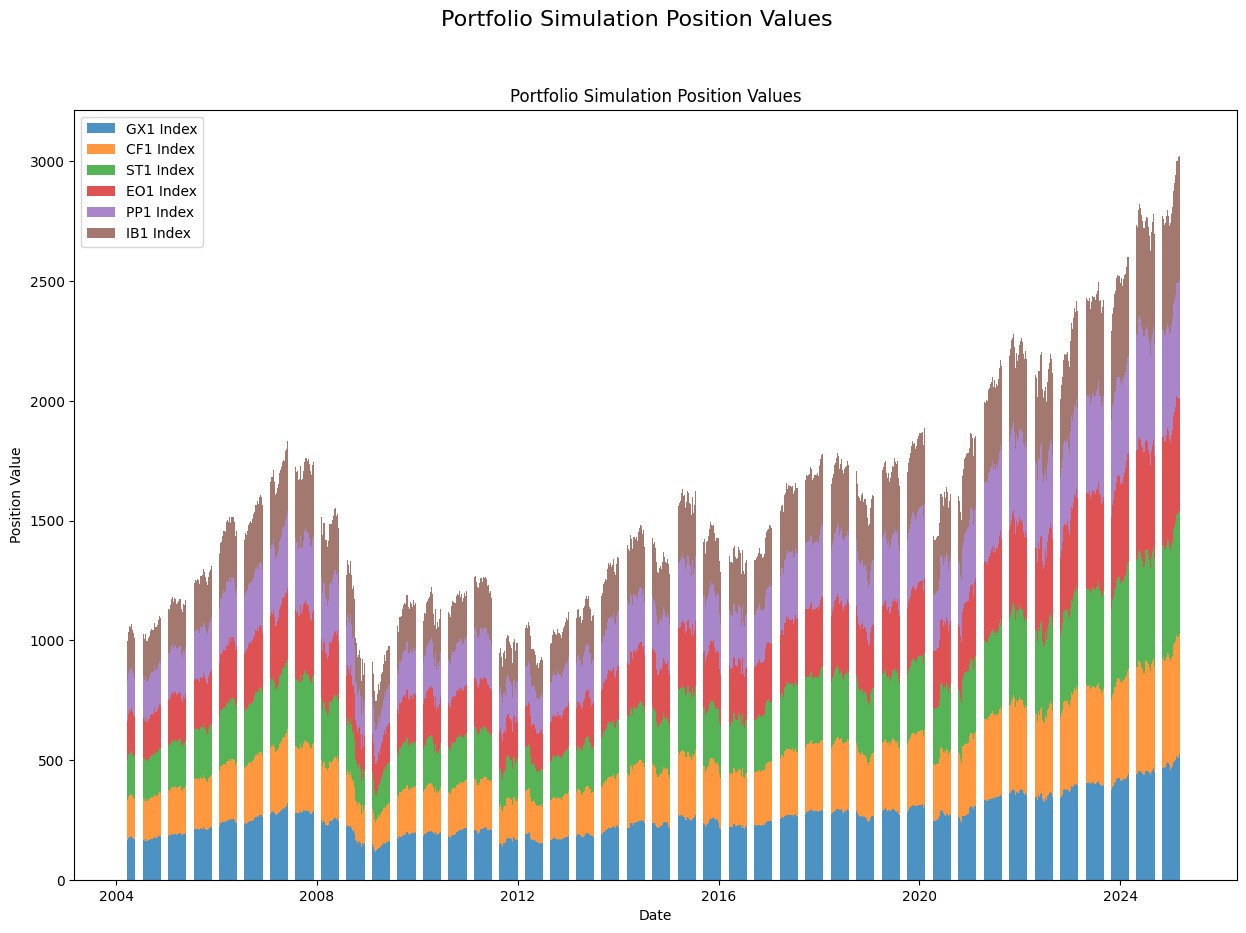

In [39]:
# Prepare data for plotting
data_to_plot = []
for future in equal_weighted_test.futures:
    # Filter out dates with no data (NaN or zero values)
    valid_data = portfolio_simulation[future.name]['Position Value'].dropna()
    valid_data = valid_data[valid_data != 0]  # Exclude zero values if needed
    data_to_plot.append(valid_data)

# Plotting stacked bar chart of the portfolio simulation
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Simulation Position Values', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Initialize the bottom variable to stack the bars
bottom = np.zeros(len(data_to_plot[0].index))

for i in range(len(data_to_plot)):
    plt.bar(data_to_plot[i].index, 
            data_to_plot[i], 
            bottom=bottom, 
            label=equal_weighted_test.futures[i].name, 
            alpha=0.8, 
            width=1)  # Set the width to 1 to remove horizontal space
    bottom += data_to_plot[i].values  # Update the bottom for the next bar

plt.title('Portfolio Simulation Position Values')
plt.xlabel('Date')
plt.ylabel('Position Value')
plt.legend()
plt.show()